A collection of python tools for astronomical image analysis. <br>
By Geferson Lucatelli

Objectives:
1. Basic image manipulation and plotting.
2. Characterize the radio emission of radio maps.
3. Disentangle the radio subcomponents on these structures, e.g. compact components, diffuse emission
4. Break down the total flux contribution coming from the diffuse emission in relation to the compact/AGN emission


Basically, this notebook contains:

    1. Plotting capabilities
    2. Signal processing / Image analysis (non-parametric)
    3. Source Extraction
    4. Sersic Image Decomposition
    5. Others

Multiple libraries, functions, etc, are placed in the library file `libs/libs.py`. The module `morphen.py` helps to deal with different kinds of tasks. You can run it on a notebook or as a `CLI`. 

ISSUES: Please, do not use LMFIT version above 1.1.0. Recommend: `pip install lmfit==1.1.0`.

Index:

1. [Introduction/Imports](#imports) <br>
2. [Data Manipulation](#data_manipulation) <br>
    2.1 [Preparing Images](#preparing_images) <br>
    2.2 [Masking](#masking) <br>
3. [Source Extraction](#source_extraction) <br>

<a id='imports'></a>

```
 _           ___                            _       
/ |         |_ _|_ __ ___  _ __   ___  _ __| |_ ___ 
| |  _____   | || '_ ` _ \| '_ \ / _ \| '__| __/ __|
| | |_____|  | || | | | | | |_) | (_) | |  | |_\__ \
|_|         |___|_| |_| |_| .__/ \___/|_|   \__|___/
                          |_|                      
```

In [1]:
# import sys
# print(sys.prefix)
# import sys
# sys.path.append("/mirror/scratch/lucatelli/app/miniconda3/envs/casa6/lib/python3.8/site-packages/")


In [2]:
import sys
import morphen as mp
sys.path.append('libs/')
import libs as mlibs
from libs import *


                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _+;]@.
                                                 _/_             |]\|    .  _
                                              ...._@* __ .

<a id='data_manipulation'></a>

```
 ____            ____        _
|___ \          |  _ \  __ _| |_ __ _
  __) |  _____  | | | |/ _` | __/ _` |
 / __/  |_____| | |_| | (_| | || (_| |
|_____|         |____/ \__,_|\__\__,_|

 __  __             _             _       _   _             
|  \/  | __ _ _ __ (_)_ __  _   _| | __ _| |_(_) ___  _ __  
| |\/| |/ _` | '_ \| | '_ \| | | | |/ _` | __| |/ _ \| '_ \ 
| |  | | (_| | | | | | |_) | |_| | | (_| | |_| | (_) | | | |
|_|  |_|\__,_|_| |_|_| .__/ \__,_|_|\__,_|\__|_|\___/|_| |_|
                     |_|                                    

````

## 2.1 Reading Imaging Data

A set of example images can be found in this link: 

https://filedn.com/lNSVniBJI40jEXAJtSnTjPQ/astrodata/LIRGI_sample/data_examples/data_examples.tar.xz
<br>
With this, you can experiment with the usage of these tools. 

In [3]:
root_path_vla = 'data_examples/vla_only/VV705_C/' #only with JVLA images.
root_path_eM = 'data_examples/emerlin_only/VV705_C/' #only with e-MERLIN images.
root_path_comb = 'data_examples/combined/VV705_C/' #only with e-MERLIN images.
prefix_images = 'MFS_images/north/*MFS-image.cutout_north.fits'

In [4]:
imagelist_vla = glob.glob(root_path_vla+prefix_images)
imagelist_comb = glob.glob(root_path_comb+prefix_images)
imagelist_eM = glob.glob(root_path_eM+prefix_images)

In [5]:
#this function is helpfull to sort the image list according to the restoring 
# beam size (from smaller beams to larger beams). 
imagelist_vla,residuallist_vla = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_vla,return_df = False)
imagelist_eM,residuallist_eM = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_eM,return_df = False)
imagelist_comb,residuallist_comb = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_comb,return_df = False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 111.60it/s]


0 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits
1 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits
2 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits
3 >> clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 153.19it/s]


0 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-image.cutout_north.fits
1 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits
2 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits
3 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits
4 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 160.16it/s]

0 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-1.0-MFS-image.cutout_north.fits
1 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.6-MFS-image.cutout_north.fits
2 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.4-MFS-image.cutout_north.fits
3 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.2-MFS-image.cutout_north.fits
4 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits
5 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits
6 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits


In [6]:
imagelist_comb

array(['data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-1.0-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.6-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.4-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.2-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits',
       'data_examples/combined/VV705_C/MFS_images/north/clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits',


In [7]:
residuallist_vla

array(['data_examples/vla_only/VV705_C/MFS_residuals/north/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-residual.cutout_north.fits',
       'data_examples/vla_only/VV705_C/MFS_residuals/north/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-residual.cutout_north.fits',
       'data_examples/vla_only/VV705_C/MFS_residuals/north/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-residual.cutout_north.fits',
       'data_examples/vla_only/VV705_C/MFS_residuals/north/clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-residual.cutout_north.fits'],
      dtype=object)

In [8]:
imagelist_eM,residuallist_eM = \
    mlibs.sort_list_by_beam_size(imagelist=imagelist_eM,return_df = False)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 154.99it/s]

0 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-image.cutout_north.fits
1 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-image.cutout_north.fits
2 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits
3 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits
4 >> clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits


In [9]:
residuallist_eM

array(['data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-residual.cutout_north.fits',
       'data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.0-MFS-residual.cutout_north.fits',
       'data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-residual.cutout_north.fits',
       'data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-residual.cutout_north.fits',
       'data_examples/emerlin_only/VV705_C/MFS_residuals/north/clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-residual.cutout_north.fits'],
      dtype=object)

For general use, you can use the function `ctn`, means, casa to numpy. It just reads fits files, even those cases that astropy wont work at first glance (e.g. some CASA converted images). 

In [10]:
mlibs.ctn??

Signature: mlibs.ctn(image)
Source:   
def ctn(image):
    '''
        ctn > casa to numpy
        FUnction that read fits files inside CASA environment.
        Read a CASA format image file and return as a numpy array.
        Also works with wsclean images!
        Note: For some reason, casa returns a rotated mirroed array, so we need
        to undo it by a rotation.
        '''
    try:
        ia = IA()
        ia.open(image)
        try:
            numpy_array = ia.getchunk()[:, :, 0, 0]
        except:
            numpy_array = ia.getchunk()[:, :]
        ia.close()
        # casa gives a mirroed and 90-degree rotated image :(
        data_image = np.rot90(numpy_array)[::-1, ::]
        return (data_image)
    except:
        try:
            data_image = pf.getdata(image)
            return (data_image)
        except:
            print('Error loading fits file')
            return(ValueError)
File:      /media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.p

## 2.2 Quick look to the data: reading and plotting.

Quick check of the image(s).

`eimshow` is a wraper for plt.imshow, means enhanced-imshow, designed to be customized and fast. Default arguments works well.

Using the module `morphen.py`, we can also import the data with:

In [11]:
idx = -2
input_data=mp.read_data(filename=imagelist_vla[idx],
                        residualname=residuallist_vla[idx])

Image File: clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits
Residual File: clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-residual.cutout_north.fits


Numpy arrays containing the can be are acessed as:

In [12]:
image_data = input_data.image_data_2D
residual_data = input_data.residual_data_2D

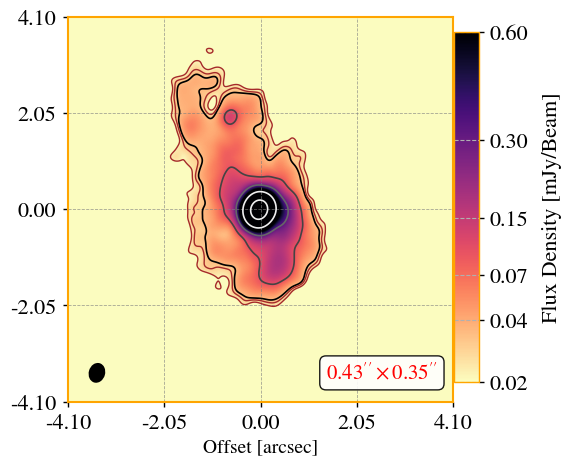

In [13]:
ax=mlibs.eimshow(input_data.filename,add_beam=True,
        vmin_factor=3.0,vmax_factor=0.1, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which negative std level?
        CM='magma_r',
       )

/home/sagauga/miniconda3/envs/morphen38/lib/python3.8/site-packages/numpy/core/function_base.py:431: RuntimeWarning: invalid value encountered in log10
  log_start = _nx.log10(start)


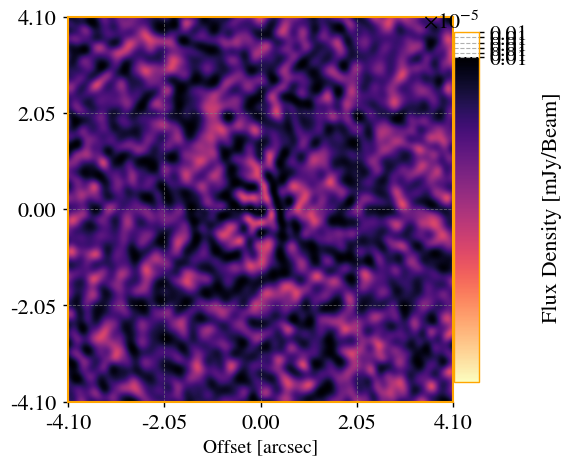

In [14]:
ax=mlibs.eimshow(input_data.residualname,
        vmin_factor=-3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        CM='magma_r',add_contours=False # remove contours
       )

#### Want to zoom-in in the image? 

Use the argument `crop=True` and provide a `box_size`, e.g. `box_size = 50`.

  >> Center -->  [508 510   0   0]


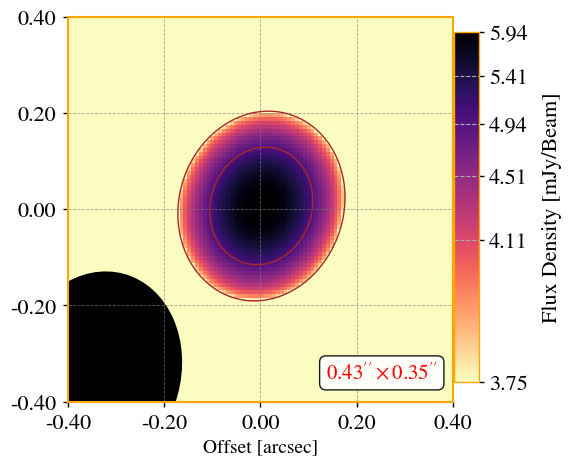

In [15]:
ax=mlibs.eimshow(input_data.filename,
        vmin_factor=3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=50,add_beam=True,
       )

#### Use proper RMS value
If the zoom-in is not computing the `rms` value properly (e.g. because the zoom-in box is too small), you can provide it 
use the residual `rms` or a custom of your choice. 

  >> Center -->  [508 510   0   0]


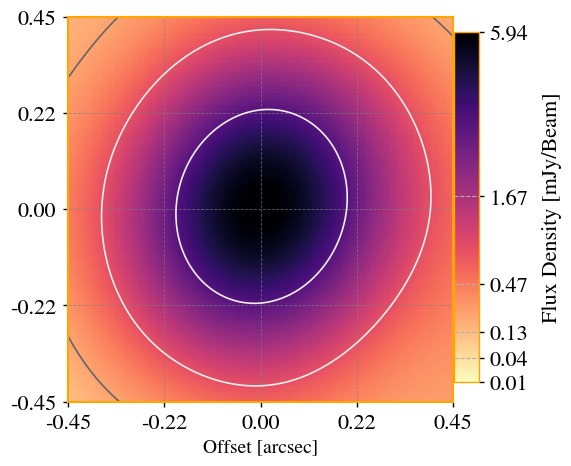

In [16]:
rms = mad_std(residual_data)
ax=eimshow(input_data.filename,rms=rms,
        vmax_factor=0.99, vmin_factor=3.0, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=56
       )

# 3 Basic Image Analysis

The default option of the following functions is to receive the imagefile as actually the filename, not the data it contains. 

Why? Because radio astronomy requires constantly reading information from the image header. 
You can provide as input a numpy array using the `data_2D` option, but in that case you MUST provide the file name from which the data comes from. 

I am going to demonstrate the usage of the code for two extreme cases, to demonstrate that it can do reliable measurements. 
The first case, refers to a interesting radio emission, with enough SNR, and the other case is an extreme situation, with poor SNR (e.g. eMERLIN image of VV 250 NW). 

Be aware that these functions are in current development and improvements. 

If you  may want to request some kind of particular analysis, suggest modifications, point out issues, etc, fell free to send me an e-mail.

Here, I will just list some operations that currently are performed.

## 3.1 - Some functions

### 3.1.1 Masking
Masking is critical to obtain accurate information of the emission structure and its total integrated flux density. 
In here, we use a conservative threshold based on the median absolute deviation (`mad`), where we use `6 sigma_mad` and from that apply a mask dilation to recover the faint emission. You can set another threshold as well. 

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


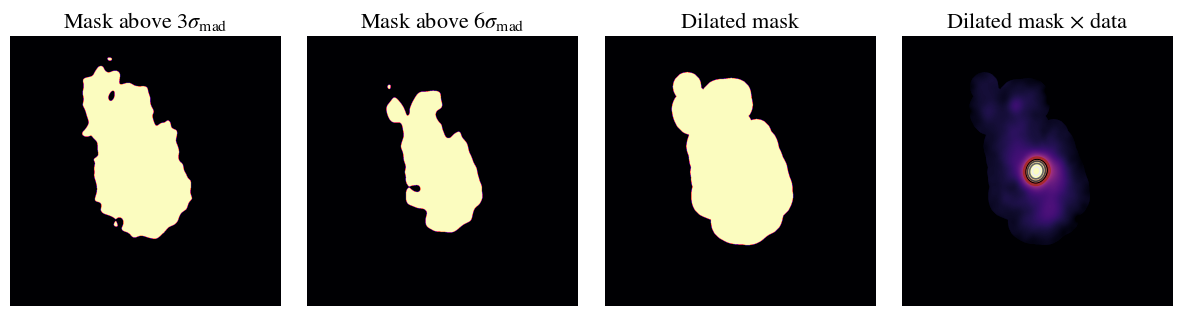

In [17]:
mask = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=6,dilation_size=None)

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


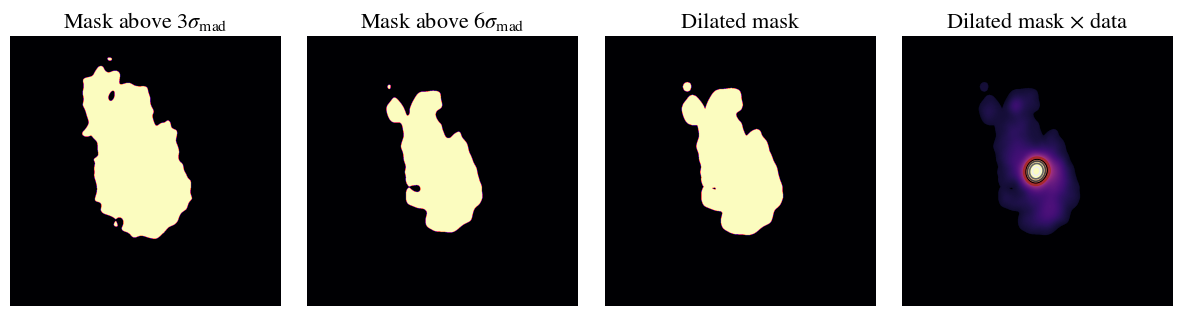

In [18]:
_ = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=6,dilation_size=5)

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


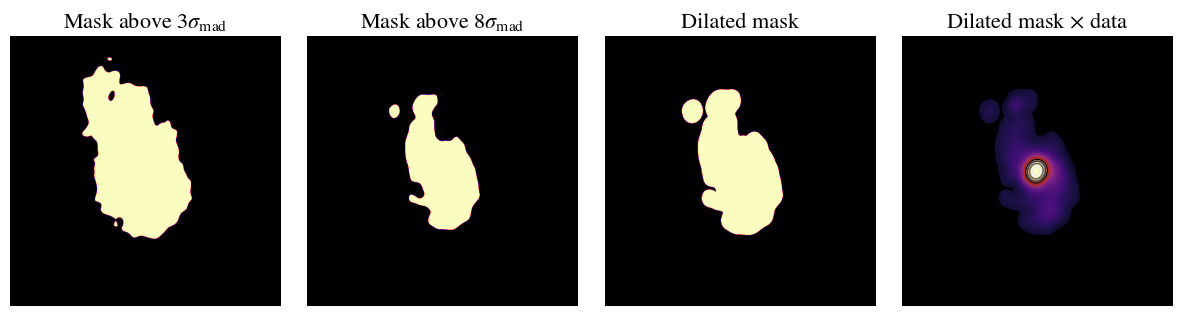

In [19]:
_ = mlibs.mask_dilation(image=input_data.filename,PLOT=True,sigma=8,dilation_size=10)

### 3.1.2 - `level_statistics()`
Function to compute basic image statistics, such as total flux density and uncertain flux density. 

It splits the range of image intensity values in four distinct regions:

1. Inner region: intensities/fluxes within `[peak intensity, 0.1 * peak intensity]`
2. Mid region: intensities/fluxes within `[0.1 * peak intensity, 10 * rms]`
3. Low region: intensities/fluxes within `[10 * rms, 6 * rms]`
4. Uncertain region: intensities/fluxes within `[6 * rms, 3 * rms]`
    
The flux uncertainty is computed as being the flux from $6 \times \sigma_{\rm mad}$ to $3 \times \sigma_{\rm mad}$.

Note that you do not have to provide the dilated mask computed previously. It is calculated inside the function, using the `6 sigma` threshold. You can change the `sigma` argument accordingly, or provide the mask as well, with the `mask` argument. 



In [21]:
# mlibs.level_statistics??

In [22]:
mask[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Mad    >   5.768045406703081e-06
std    >   0.00024980091257098606
median >   2.983047238558356e-06
mean   >   3.319125076308352e-05
0.013048239916257677
2.529493291744122e-05
0.013224403269630688
Low Flux (extended) Jy                    >  0.000665977387974798  >> ratio= 0.056453367384805504
Mid Flux (outer core + inner extended) Jy >  0.0033079541018975096  >> ratio= 0.28040764082753106
Inner Flux (core) Jy                      >  0.007823015598071408  >> ratio= 0.6631389917876634
Uncertain Flux (<5std)                    >  0.0  >> ratio= 0.0
Total Flux Jy                             >  0.011796947087943715
Total area (in # ob beams)                >  65.90628874497077
Total inner area (in # ob beams)          >  3.636720032159788
Total mid area (in # ob beams)            >  23.057891726209636
Total low area (in # ob beams)            >  14.598556434602346
Total uncertain area (in # ob beams)      >  0.0
Inner Flux (core) fraction                >  0.6631389917876634
Outer Flux (ex

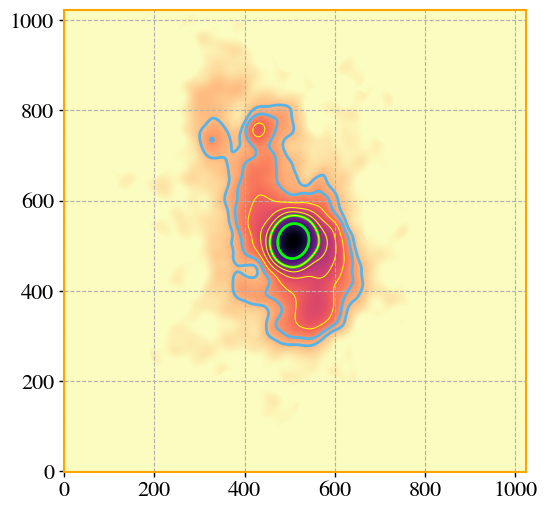

{'#imagename': 'clean_image__SDSSJ1518+4244.calibrated_avg_8s_newshift_RR_LL_4096_0.008arcsec_10000.briggs.-multiscale..1.0-MFS-image.cutout_north.fits',
 'total_flux': 0.011796947087943715,
 'inner_flux': 0.007823015598071408,
 'low_flux': 0.000665977387974798,
 'mid_flux': 0.0033079541018975096,
 'uncertain_flux': 0.0,
 'inner_flux_f': 0.6631389917876634,
 'low_flux_f': 0.056453367384805504,
 'mid_flux_f': 0.28040764082753106,
 'uncertain_flux_f': 0.0,
 'number_of_beams': 65.90628874497077,
 'n_beams_inner': 3.636720032159788,
 'n_beams_mid': 23.057891726209636,
 'n_beams_low': 14.598556434602346,
 'n_beams_uncertain': 0.0}

In [23]:
mlibs.level_statistics(img=input_data.filename,show_figure=True, sigma=2, mask=None)

### 3.1.3 - Image Shape Analysis
Now, we can calculate global properties of the radio emission, for example:
 - Total integrated flux density
 - Peak brightness
 - Flux density uncertainty
 - Half-light radius $R_{50}$
 - Orientation $PA$
 - Axis ratio $q$

Argument options: 
 - `last_level` means that almost all emission inside the dilated mask should be used in the computation. If using, for example `last_level=3`, a new threshold is calculated inside the masked region, above `3 sigma mad`. 

5.999
128 512 384
19.0325156108475 40.204198811085504 104.94532891920039 158.61254731080413
Sum of fluxes =  0.01251526576944208


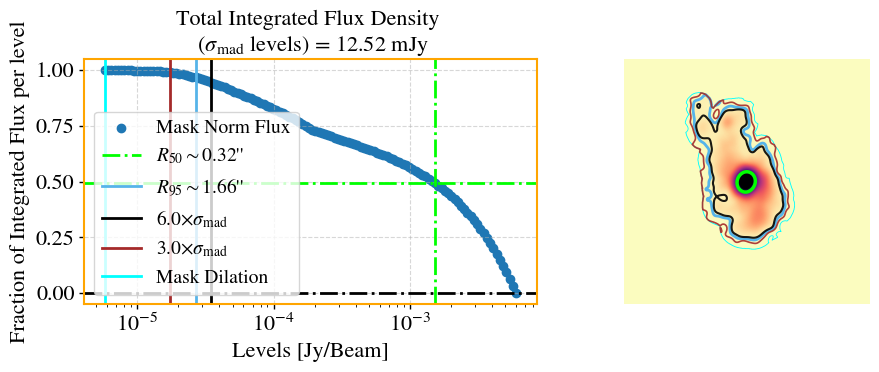

In [24]:
image_measures = mlibs.compute_image_properties(input_data.filename,
                                                input_data.residualname,
                                                last_level=1)

5.999
128 512 384
20.137695871130575 39.666179137981985 101.72167650101174 154.2859948876839
Sum of fluxes =  0.012385403958040449


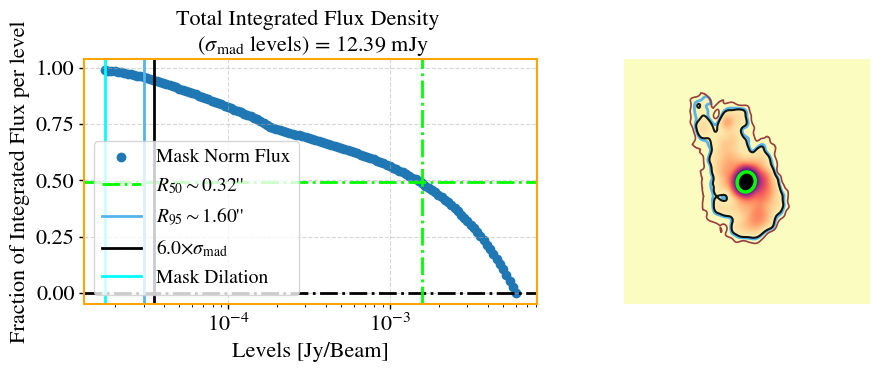

In [25]:
image_measures = mlibs.compute_image_properties(input_data.filename,
                                                input_data.residualname,
                                                last_level=3)

### 3.1.4 - Adding and calling all functions.  
In `morphen.py` the class `radio_image_analysis` contain all the function calls for common statistical calculations. 

All possible modifications can be made and calculations of interest can be implemented. 

In [26]:
mp.radio_image_analysis??

Init signature:
mp.radio_image_analysis(
    input_data,
    z=None,
    do_petro=False,
    crop=False,
    box_size=256,
    apply_mask=True,
    mask=None,
    dilation_size=None,
    sigma_level=3,
    sigma_mask=6,
    vmin_factor=3,
    last_level=3,
    results=None,
    mask_component=None,
    npixels=128,
    kernel_size=21,
    fwhm=81,
    SAVE=True,
    show_figure=True,
)
Docstring:      <no docstring>
Source:        
class radio_image_analysis():
    def __init__(self, input_data,z = None,do_petro=False,
                 # logger=None,
                 crop=False,box_size=256,
                 apply_mask=True,mask=None,dilation_size = None,
                 sigma_level=3, sigma_mask=6,vmin_factor=3,last_level=3,
                 results=None,mask_component=None,
                 npixels=128,kernel_size=21,fwhm=81,
                 SAVE=True, show_figure=True):
        self.input_data = input_data
        # self.logger = logger
        self.crop = crop
        self.box_si

### 3.2 Analysing an $e$-MERLIN Image
So, lets work with an example.

2023-10-05 11:53:14 - INFO - Computing image level statistics.


     >> CALC: Performing mask dilation.
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


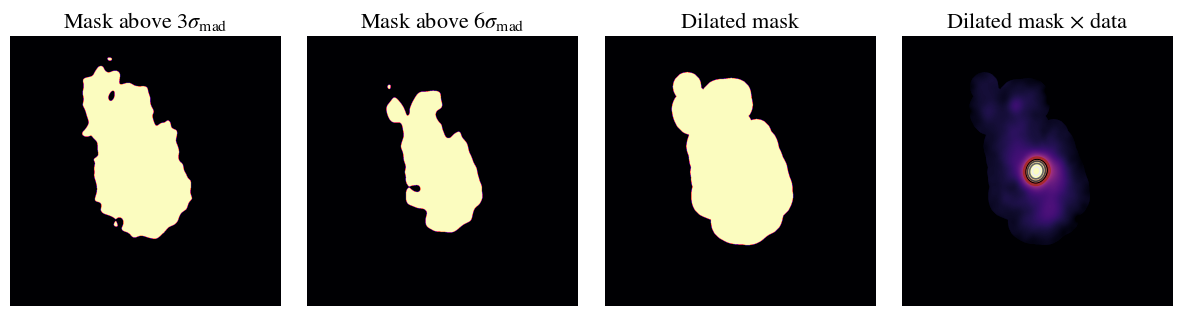

0.012520350197311209
2.5275811462596344e-05
0.013224403269630688
Mad    >   5.768045406703081e-06
std    >   0.00024980091257098606
median >   2.983047238558356e-06
mean   >   3.319125076308352e-05
Low Flux (extended) Jy                    >  0.0008818280395861851  >> ratio= 0.07048369997042062
Mid Flux (outer core + inner extended) Jy >  0.0033079541018975096  >> ratio= 0.264401713222319
Inner Flux (core) Jy                      >  0.007823015598071408  >> ratio= 0.6252864045207028
Uncertain Flux (<5std)                    >  0.0004982940441658907  >> ratio= 0.03982818228655743
Total Flux Jy                             >  0.012511091783720995
Total area (in # ob beams)                >  63.94714879242497
Total inner area (in # ob beams)          >  3.636720032159788
Total mid area (in # ob beams)            >  23.057891726209636
Total low area (in # ob beams)            >  21.18804539058553
Total uncertain area (in # ob beams)      >  26.059677146130472
Inner Flux (core) fraction     

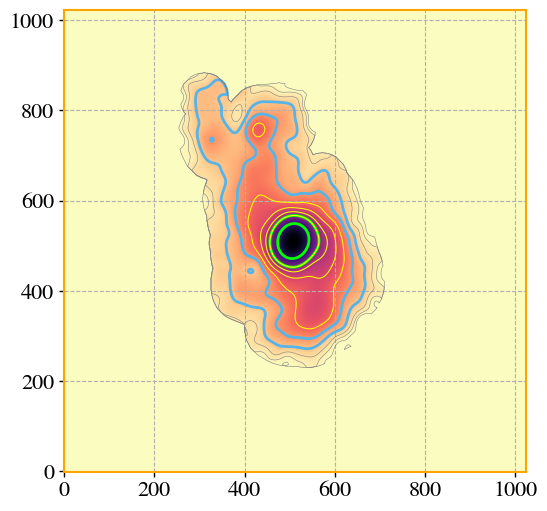

5.999
128 512 384


2023-10-05 11:53:18 - INFO - +---------------------------+
2023-10-05 11:53:18 - INFO - | Basic Source Properties |
2023-10-05 11:53:18 - INFO - +---------------------------+
2023-10-05 11:53:18 - DEBUG -  ==>  Peak of Flux=6.00 [mJy/beam]
2023-10-05 11:53:18 - DEBUG -  ==>  Total Flux Inside Mask='12.52 [mJy]
2023-10-05 11:53:18 - DEBUG -  ==>  Total Flux Image=13.22 [mJy]
2023-10-05 11:53:18 - DEBUG -  ==>  Half-Light Radii=40.20 [px]
2023-10-05 11:53:18 - DEBUG -  ==>  Total Source Size=207.22 [px]
2023-10-05 11:53:18 - DEBUG -  ==>  Source Global Axis Ratio=0.65
2023-10-05 11:53:18 - DEBUG -  ==>  Source Global PA=95.08 [degrees]
2023-10-05 11:53:18 - DEBUG -  ==>  Inner Axis Ratio=0.90
2023-10-05 11:53:18 - DEBUG -  ==>  Outer Axis Ratio=0.61
2023-10-05 11:53:18 - DEBUG -  ==>  Inner PA=165.98 [degrees]
2023-10-05 11:53:18 - DEBUG -  ==>  Outer PA=93.82 [degrees]


19.0325156108475 40.204198811085504 104.94532891920039 158.61254731080413
Sum of fluxes =  0.01251526576944208


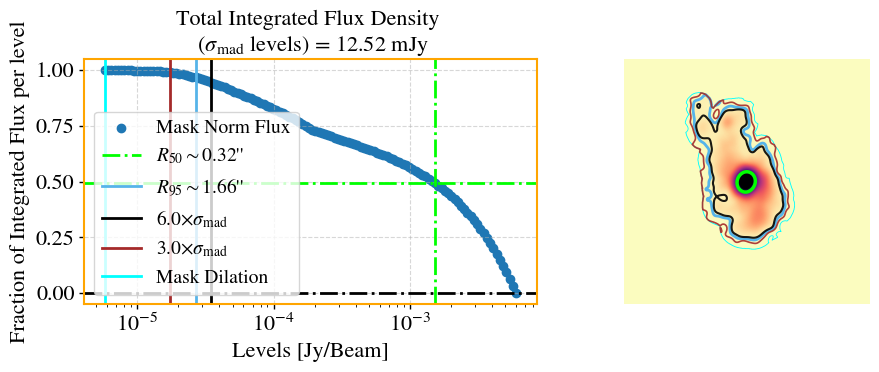

1


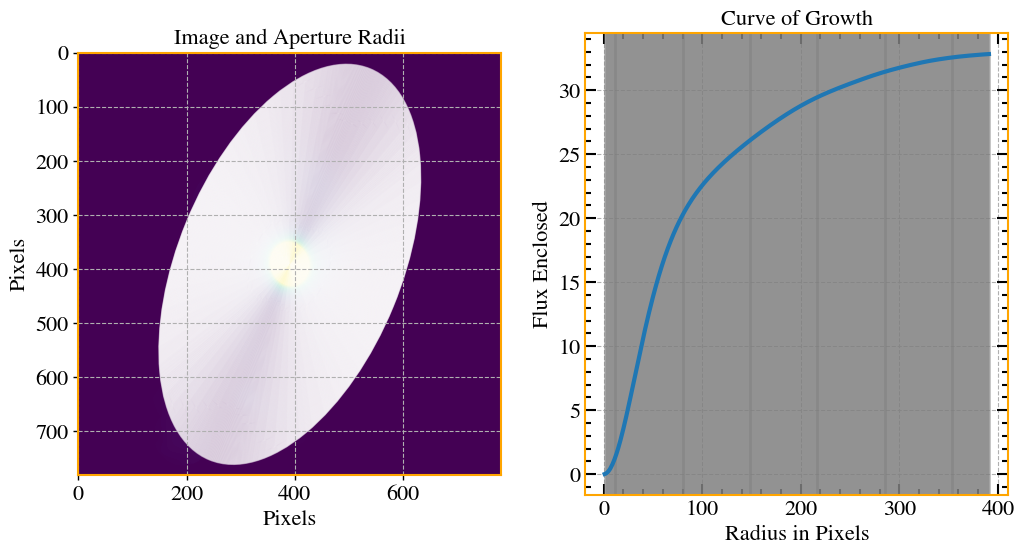

Rlast     >>  391
Rp        >>  201.71814362872573
Rtotal    >>  nan
1


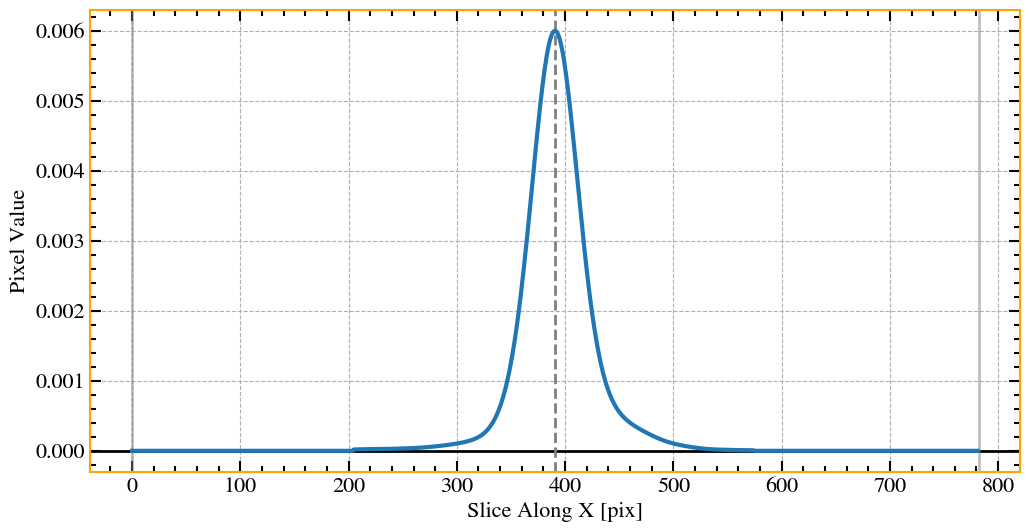

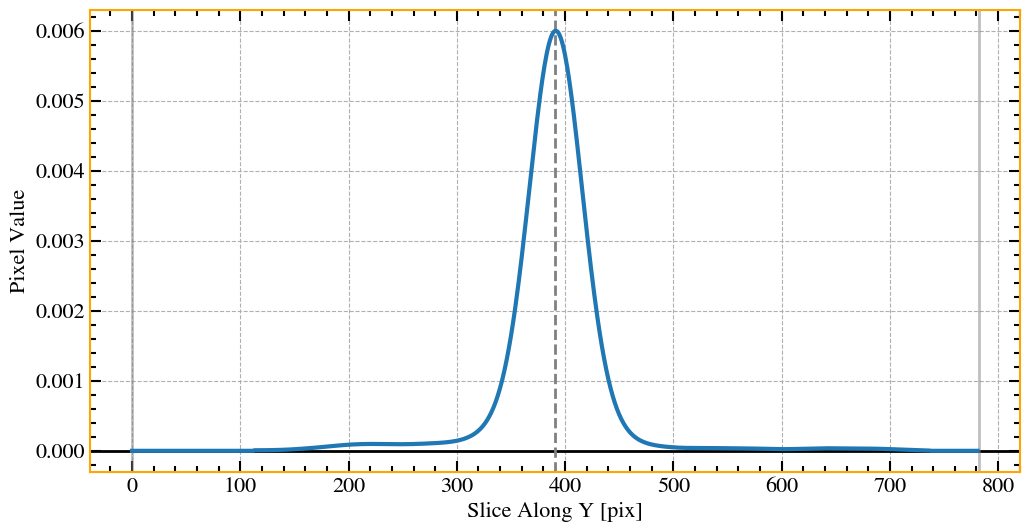

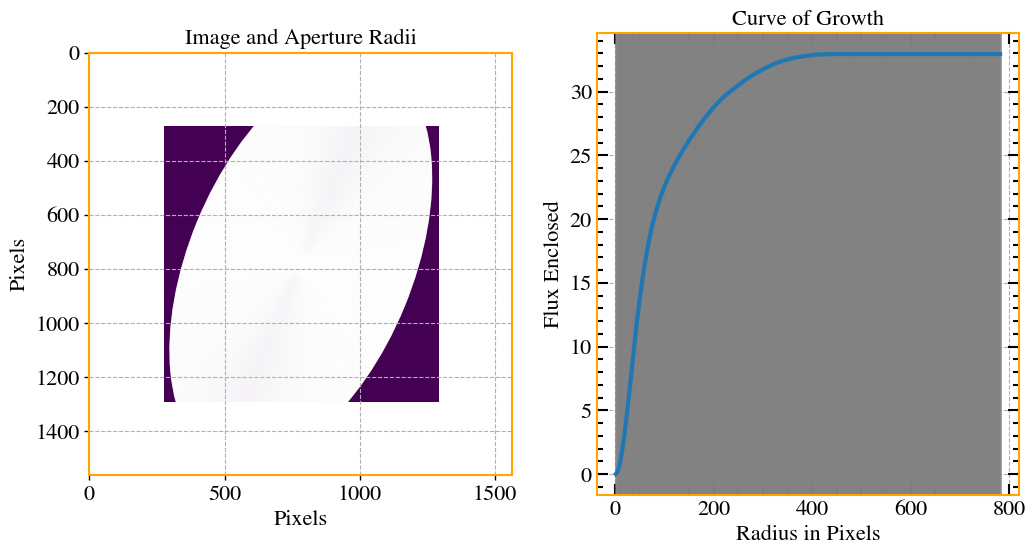

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2009: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


eta = 0.2
epsilon = 2
r_half_light (old vs new) = 53.34
r_total_flux (old vs new) = 212.69
R50 =  53.33746749349871
Rp= 106.37327465493098


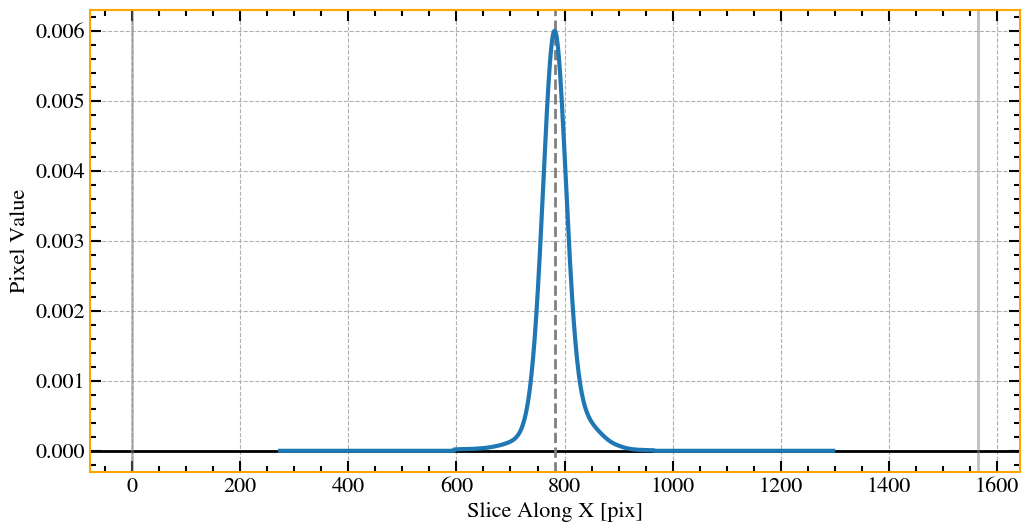

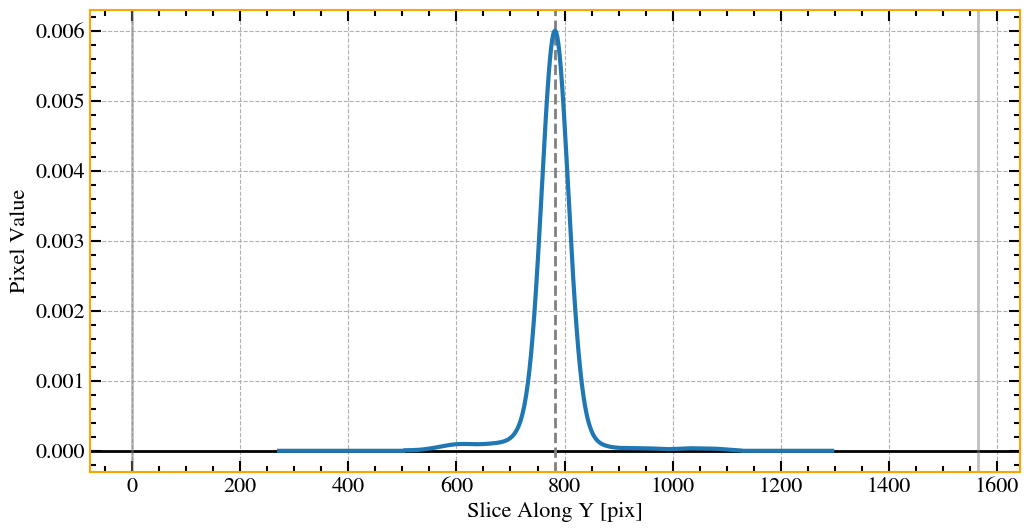

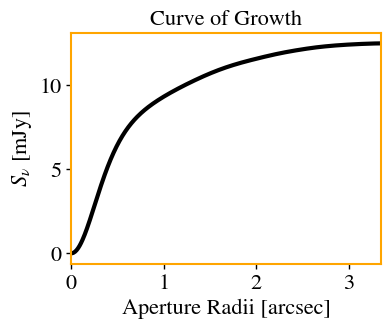

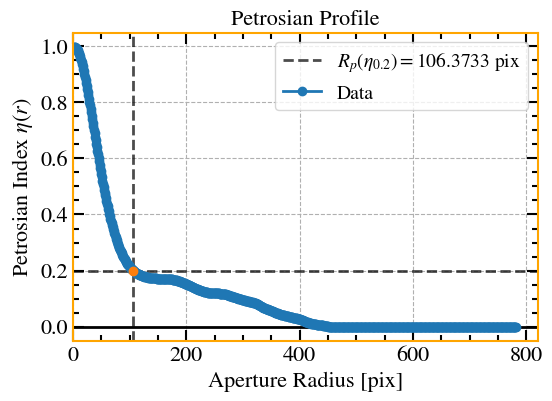

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2009: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


--==>> Computing asymetries...
--==>> Computing image statistics...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.97it/s]

Estimate #1 of flux error (based on sum of residual map): 
Flux =  12.520350197311208 +/- 0.1010805088437938 mJy
Fractional error flux =  0.008073297252140855
-----------------------------------------------------------------
Estimate #2 of flux error (based on rms of residual x area): 
Flux =  12.520350197311208 +/- 0.2993115569899533 mJy
Fractional error flux =  0.023906005205368102


In [27]:
analysis = mp.radio_image_analysis(input_data,z=z_d['VV705'],crop=False,box_size=50,last_level=1, do_petro=True)

Note that multiple quantities are calculated (many of them are for 
testing purposes). They are stored in `image_measures`. The ones that may be interesting are: 
- `total_flux_mask` > Total integrated flux inside the dilated mask
- `uncertain_flux_mask` > Total integrated flux error inside the dilated mask (from `6*rms` to `3*rms`
- `C50radii` > Half-flux equivalent circular radii of the source
- `C95radii` > approximated full-size circular radii of the source 
    (at the 95% flux)
- `rms_residual` > background rms of the residual image
- `peak_of_flux` > peak brightness of the radio map
- `A50` > area enclosing the half-to-total flux (as multiple of the restoring 
    beam area)
- `A95` > total estimated emission area (as multiple of the restoring beam area)
- `qmi` > median averaged axis ratio of the region enclosing the half-light flux
- `qmo` > median averaged axis ratio of the outer region (from A50)
- `PAmi` > median averaged position angle (in degrees) of the region enclosing 
    the half-light flux
- `PAmo` > median averaged position angle (in degrees) of the outer region 
    (from A50)


In [28]:
# proper estimate for the total integrated flux  (good estimate, even if image contains deconvolution errors). 
# However, sometimes may be underestimated. 
f"{analysis.image_measures['total_flux_mask'] * 1e3:.2f} +/- "\
    f"{analysis.image_measures['uncertain_flux']*1e3:.2f}mJy"


'12.52 +/- 0.50mJy'

In [29]:
# upper total integrated flux  (may be overstimated if image contains deconvolution errors)
f"{analysis.image_measures['total_flux_nomask'] * 1e3:.2f}mJy"

'13.22mJy'

In [30]:
#total integrated flux (only uses positive pixel values, ignores negative intensities)
f"{analysis.image_measures['total_flux_levels'] * 1000:.2f}mJy"

'12.52mJy'

In [31]:
f"{analysis.image_measures['rms_residual'] * 1e6:.2f} mu Jy/beam"

'3.26 mu Jy/beam'

In [32]:
f"{analysis.image_measures['rms_im'] * 1e6:.2f} mu Jy/beam"

'252.00 mu Jy/beam'

In [33]:
print(f"{analysis.image_measures['qmi']:.2f}")
print(f"{analysis.image_measures['qmo']:.2f}")

0.90
0.61


In [34]:
print(f"{analysis.image_measures['PAmi']:.2f}")
print(f"{analysis.image_measures['PAmo']:.2f}")

165.98
93.82


In [35]:
print(f"{analysis.image_measures['PAm']:.2f}")
print(f"{analysis.image_measures['qm']:.2f}")

95.08
0.65


#### Using PetroFit

In [36]:
#total integrated flux  using the Petrosian method.
f"{analysis.image_measures['total_flux_rp'] * 1e3:.2f}mJy"

'11.13mJy'

In [37]:
analysis.image_measures['Rp'], analysis.image_measures['r_total_flux'],analysis.image_measures['C95radii'], analysis.image_measures['Cradii']

(106.37327465493098,
 212.69333866773357,
 207.21893093129106,
 252.30252866091735)

#### Physical Scale Sizes
Lets convert the pixel size to a linear size scale, in $\rm pc$. 

We can use the function `pixsize_to_pc`:

In [38]:
pixsize_to_pc??


Signature: pixsize_to_pc(z, cell_size, Om0=0.308)
Docstring: <no docstring>
Source:   
def pixsize_to_pc(z, cell_size, Om0=0.308):
    h = 67.8  # * (h1 + h2) / 2
    cosmo = FlatLambdaCDM(H0=h, Om0=Om0)
    d_A = cosmo.angular_diameter_distance(z=z)
    # print('D_a = ', d_A)  # 946.9318492873492 Mpc
    theta = cell_size * u.arcsec
    distance_pc = (theta * d_A).to(u.pc, u.dimensionless_angles())  # unit is Mpc only now

    # print('Linear Distance = ', distance_pc)  # 3.384745689510495 Mpc
    return (distance_pc.value)
File:      /media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py
Type:      function

In [39]:
# pixsize_to_pc(z=0.023,cell_size=0.05)

In [40]:
print(f"Redshift of VV705 = {z_d['VV705']}")
pix_to_pc = pixsize_to_pc(z=z_d['VV705'],
                          cell_size=get_cell_size(input_data.filename))

Redshift of VV705 = 0.04019


In [41]:
# Now, we can get the half-light circular radii of the source in pc:
f"{analysis.image_measures['C50radii']*pix_to_pc:.0f} pc"

'264 pc'

In [42]:
# and the full size circular radii:
f"{analysis.image_measures['C95radii']*pix_to_pc:.0f} pc"

'1360 pc'

In [43]:
# Maximum size
f"{analysis.image_measures['Cradii']*pix_to_pc:.0f} pc"

'1656 pc'

In [44]:
print(analysis.image_measures['C50radii'])#half-light radii source size in pixels
print(analysis.image_measures['C95radii'])#total source size in pixels

40.204198811085504
207.21893093129106


In [45]:
# mlibs.eimshow(analysis.mask)
# mlibs.eimshow(analysis.omask)

# Source Extraction

Before we head to the Sersic fitting, we must understand the structure of the radio emission. 
For that, we can perform a simple source extraction to the image and compute basic prior information. 

We use this to construct a physically constrained Sersic model. The class `source_extraction` allow us to find relevant regions of emission. Only after that, one should proceed to the Sersic fitting. 

Lets load our data again, if required.

In [17]:
# lets select another image from our list of images. 
idx = -1
input_data=mp.read_data(filename=imagelist_eM[idx],
                        residualname=residuallist_eM[idx])

Image File: clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits
Residual File: clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-residual.cutout_north.fits


In [18]:
image_data = input_data.image_data_2D
residual_data = input_data.residual_data_2D

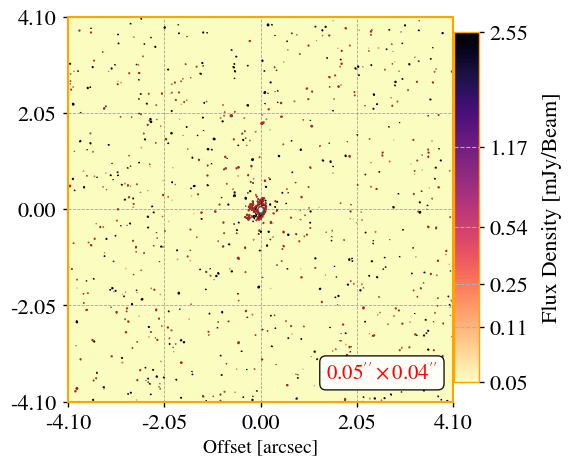

In [19]:
ax=mlibs.eimshow(input_data.filename,add_beam=True,crop=False,box_size=300,
        vmin_factor=3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which negative std level?
        CM='magma_r',
       )

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


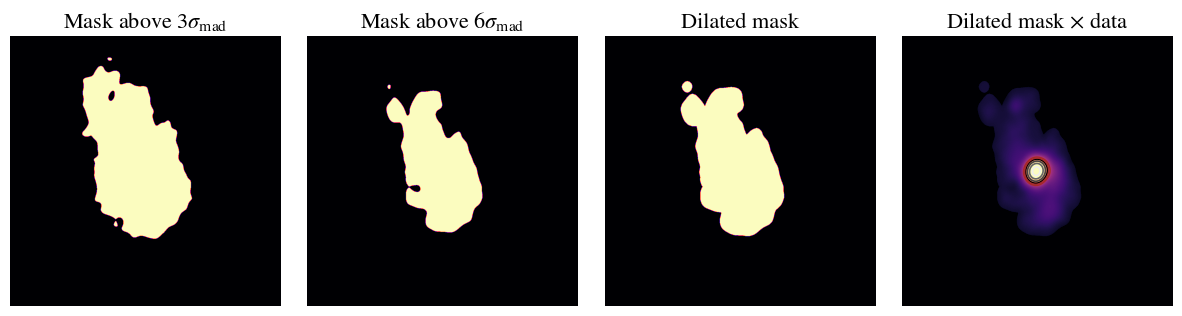

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


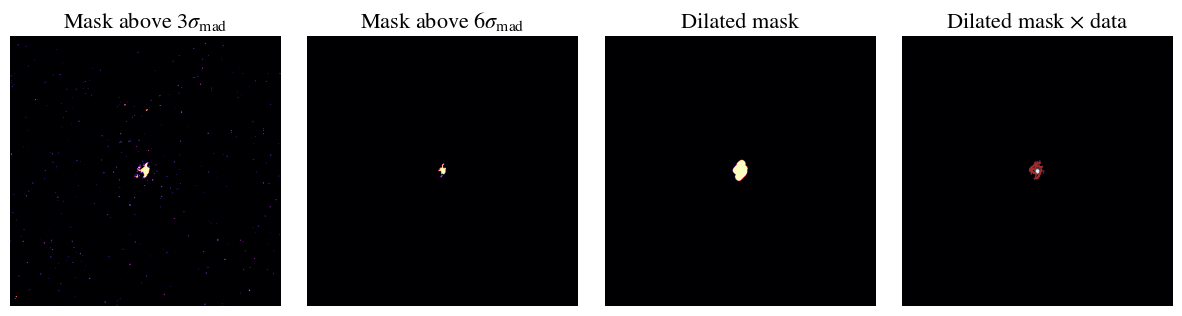

In [20]:
std = mad_std(ctn(imagelist_vla[2]))
_, mask = mask_dilation(ctn(imagelist_vla[2]), PLOT=True,dilation_type='disk',
                        sigma=6, iterations=2, dilation_size=None)
_, mask_self = mask_dilation(ctn(input_data.filename), PLOT=True,dilation_type='disk',
                        sigma=6, iterations=2, dilation_size=None)


To check if the source detection is good, you may pass the argument `dry_run=True` which will only display the regions detected, without performing any calculations. 

Parameters that are critical for the source detection are the `SEP` arguments for the source extraction `bwf`, `bhf`, `fwf` and `fhf`. 

Currently, we are also implementing a Photutils algorithm (within PetroFit) for source detection, but more testing is required. 

WARNING: This is implementation is in an early stage, so it is not completely automated. It is required that the user interacts with it in order to check if the source detection is feasible. 

In [21]:
def get_ell_size_factor(psf_current, psf_large=50, ell_large=2.0, psf_small=4, ell_small=7):
    """
    Rough linear relation between the restoring beam size (psf) with the scale factor of the ellipse to 
    be drawn on the detection map.
    """
    return ell_large + (ell_small - ell_large) * ((psf_current - psf_large) / (psf_small - psf_large))

In [22]:
# masks, indices, seg_maps, objects = \
#     sep_source_ext(input_data.filename, bw=51,
#                    bh=51,
#                    fw=51, fh=51,
#                    minarea=beam_area2(input_data.filename),
#                    segmentation_map=True,
#                    deblend_nthresh=deblend_nthresh,
#                    deblend_cont=deblend_cont,
#                    clean_param=clean_param,
#                    clean=True,
#                    sort_by='flux',
#                    # filter_kernel=None,
#                    sigma=sigma,
#                    ell_size_factor=3,
#                    apply_mask=True,
#                    show_detection=True)

So, lets run a `dry_run` source detection. This will only show the detected sources, without returning any prior properties. 

This is useful in case you do not know for sure the noise structure of the image. Imagine that the number of structures detected are many, that will take some time to compute their properties. 

5.393645922749118
object 0: flux = 0.051550 +/- 5.315219


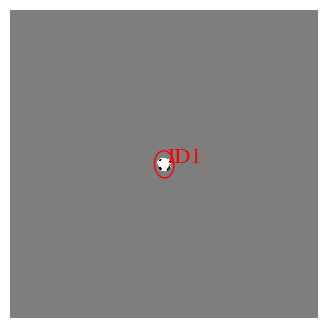

In [23]:
bwf, bhf = 2, 2
fwf, fhf = 8, 8
clean_param = 0.5
deblend_cont = 1e-6
deblend_nthresh = 5
sigma = 5
# ell_size_factor = 2.5
ell_size_factor = 1.0*get_ell_size_factor(psf_current = get_beam_size_px(input_data.filename)[0])
SE = mp.source_extraction(input_data, 
                          ell_size_factor = ell_size_factor, sigma = sigma,
                          bwf = bwf,bhf = bhf,fwf = fwf, fhf = fhf,
                          clean_param = clean_param, 
                          deblend_cont = deblend_cont, 
                          deblend_nthresh=deblend_nthresh,minarea_factor=1.0,
                          apply_mask=True,sigma_mask=10,
                          show_petro_plots=True,
                          dry_run=True)
# plt.imshow(input_data.image_data_2D)

In [24]:
SE.objects['xc'],SE.objects['yc']

(array([512]), array([510]))

Another point to consider relates to the source structure. 

#### The question we ask is: 
Is a single model component enough to model each individual structure? 

In the example above, is one model component (for structure `ID1`) enough to model the source emission? Let's look at the data again:

  >> Center -->  [512 510   0   0]


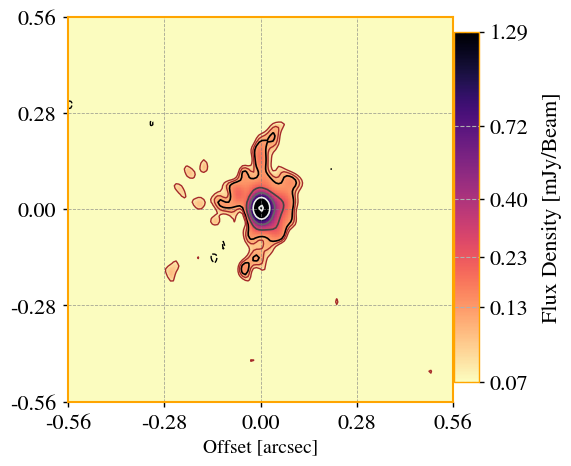

In [25]:
ax=mlibs.eimshow(input_data.filename,crop=True,box_size=70)

#### The answer is: probably not! 

So, what we can do is to specify to which source ID we may add an extra model component. 
The default is to attribute to each `ID` a model component `COMP`, for example, `ID_1` > `COMP_1`, `ID_2` > `COMP_2`, etc. 
But in our case, `ID1` is a a complicated structure, and we require an extra model component, i.e. `COMP_2`.

The argument used for this is `ids_to_add`, which is a list. In our case, to add another model component to `ID1`, we use `ids_to_add = [1]`. So, our source `ID1` will be decomposed into `COMP_1` and `COMP_2`. 

Note that at the current stage of `morphen`, this is a manual step. 

If you are happy with the source detection, and have decided how many components do you need, you may proceed. Remember to set `dry_run = False`.

5.393645922749118
object 0: flux = 0.049948 +/- 5.307537


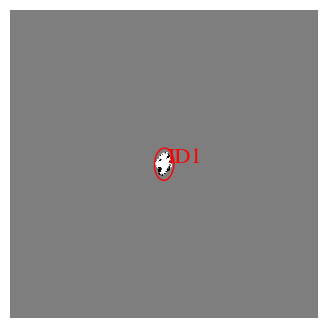

1


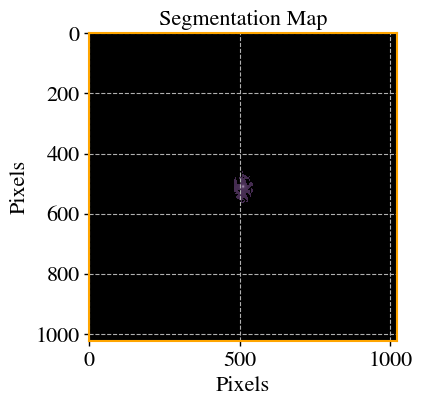

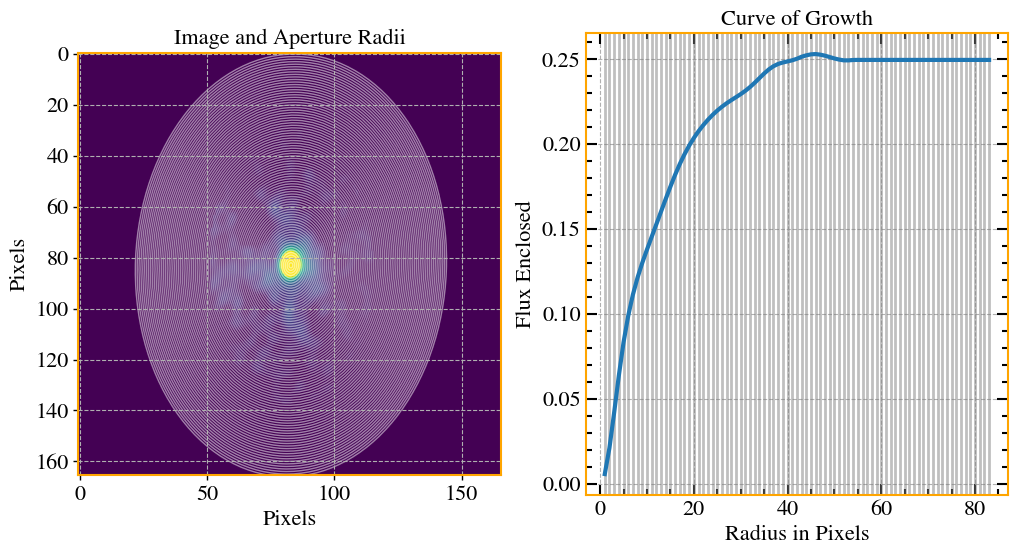

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2009: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


PSF SIZE is 1024
INFO: Using Elliptical Gaussian for Gaussian beam convolution.


2023-10-05 13:01:15	WARN	componentlist::close	componentlist closed


# of components to be fitted = 1
# of model components to be fitted = 2


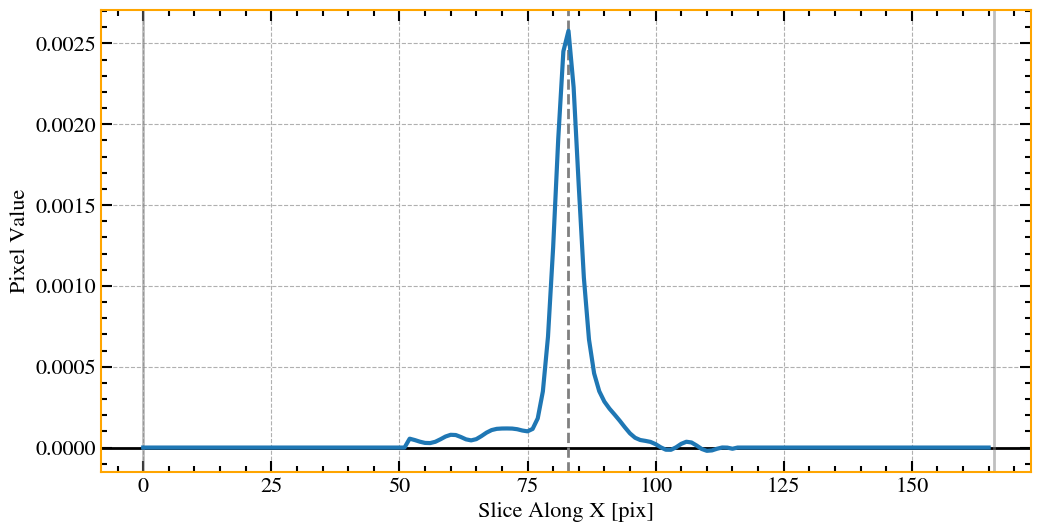

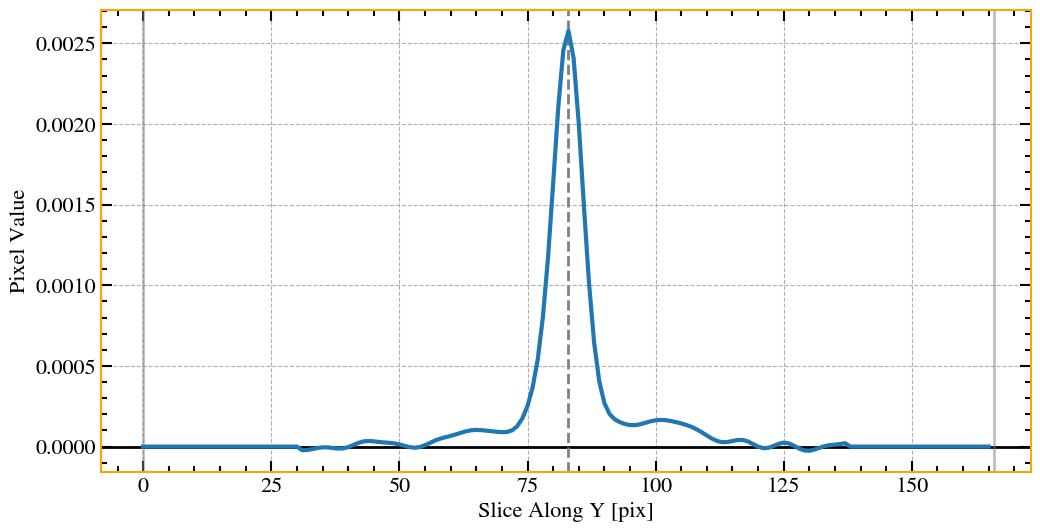

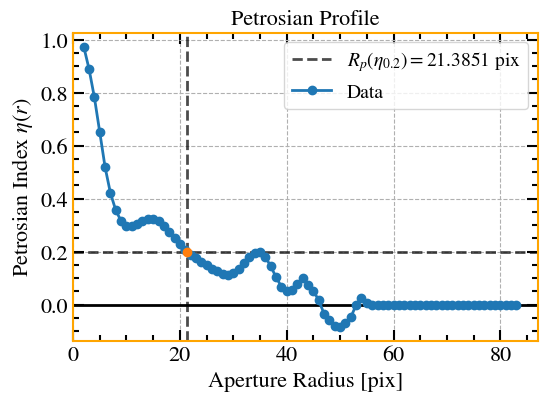

In [26]:
SE = mp.source_extraction(input_data, ids_to_add=[1],
                          ell_size_factor = ell_size_factor, sigma=sigma,
                          bwf=bwf, bhf=bhf, fwf=fwf, fhf=fhf,
                          clean_param=clean_param, 
                          deblend_cont=deblend_cont, 
                          deblend_nthresh=deblend_nthresh,
                          apply_mask=True,sigma_mask=10,
                          show_petro_plots=True,
                          dry_run=False)

In [27]:
SE.sources_photometries

{'c1_PA': -87.64580671559992,
 'c1_q': 0.7357264589597967,
 'c1_area': 3522.0,
 'c1_Re': 33.48264355064144,
 'c1_x0c': 510.7486253430508,
 'c1_y0c': 512.4532700580063,
 'c1_label': 1,
 'c1_R50': 8.611122224444888,
 'c1_R20': 3.3948789757951587,
 'c1_R80': 19.863772754550908,
 'c1_C1': 0.7672374414535502,
 'c1_Snu': 0.2511153987487031,
 'c1_Rp': 21.38507701540308,
 'c1_Rpidx': 42,
 'c1_rlast': 83,
 'c1_I50': 0.00017761935643128318,
 'ncomps': 2,
 'c2_PA': -87.64580671559992,
 'c2_q': 0.7357264589597967,
 'c2_area': 3522.0,
 'c2_Re': 33.48264355064144,
 'c2_x0c': 510.7486253430508,
 'c2_y0c': 512.4532700580063,
 'c2_label': 1,
 'c2_R50': 25.833366673334663,
 'c2_R20': 3.3948789757951587,
 'c2_R80': 19.863772754550908,
 'c2_C1': 0.7672374414535502,
 'c2_Snu': 0.2511153987487031,
 'c2_Rp': 21.38507701540308,
 'c2_Rpidx': 42,
 'c2_rlast': 83,
 'c2_I50': 1.7761935643128318e-05}

# Sersic Multi-Fit
Now, we are ready to proceed for to the fitting part. 

We can use the source extraction object `SE` to feed it into the multi-sersic fitting. 

By default, the code fixes all Sersic indeces to `0.5` for all model components. It also fixes all components to its detected positions `(x0,y0)` during the source extraction step, but gives an interval of +/-10 px during the optimisation. 

You can modify this by passing the arguments `dr_fix = [3,50]`, meaning that `COMP_1` is very constrained, and can vary only +/- 3 pixels, while `COMP_2` is constrained to a larger bound, the algorithm will search in the boundary of +/- 50 pixels during optimisation.

Another important observation is that, since we want to decompose the radio structure in terms of compact and diffuse emission, we must specify which model components corresponds to compact structures and diffuse structures. 

In our case, `COMP_1` (always the brightest part of the source, an assumption that holds for compact structures) is our compact model, and `COMP_2` will be our diffuse model. Do not worry about the diffuse labels, just focus in the compact labels. We pass this information via the argument `comp_ids`. The algorithm will determine automatically the labels for diffuse structures (in our case, `2`). If your model has a single model component (e.g. in the previous step, you have used `ids_to_add = []`), diffuse structures will be considered to be the residual. A more complicated example will be presented later.


#######################
['2'] ['1' '2']
Fitting clean_image_1518+4244_avg8s_4096_0.008arcsec_10000.briggs.-multiscale..2.0-MFS-image.cutout_north.fits
rms res =  0.9969088591188711
rms data =  17.54974547763469 ; rms res =  17.495496741935366 ; ratio =  0.9969088591188711
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


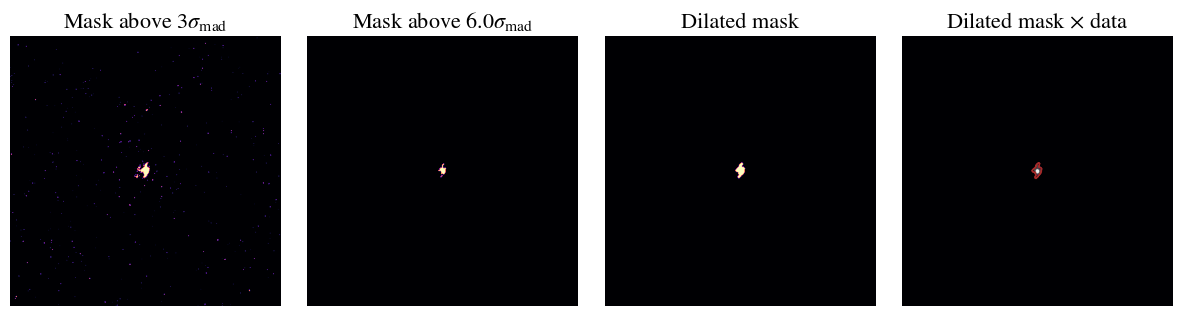

PSF BEAM SIZE is >=>  5
PSF SIZE is >=>  1024
INFO: Using Elliptical Gaussian for Gaussian beam convolution.


2023-10-05 13:01:16	WARN	componentlist::close	componentlist closed
2023-10-05 14:01:16.289945: I external/xla/xla/pjrt/tfrt_cpu_pjrt_client.cc:458] TfrtCpuClient created.
2023-10-05 14:01:16.516809: I external/xla/xla/stream_executor/cuda/cuda_gpu_executor.cc:910] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-05 14:01:16.517078: I external/xla/xla/service/service.cc:168] XLA service 0x560bd760a3b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-05 14:01:16.517108: I external/xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2023-10-05 14:01:16.517448: I external/xla/xla/pjrt/gpu/se_gpu_pjrt_client.cc:627] Using BFC allocator.
2023-10-05 14:01:16.517481: I external/xla/xla/pjrt/gpu/gp

Limiting  x0
Limiting  y0
Fixing Sersic Index of component 0  to 0.5.
Limiting  x0
Limiting  y0
Fixing Sersic Index of component 1  to 0.5.
{'f1_x0': {'value': 510.7486253430508, 'min': 505.7486253430508, 'max': 515.7486253430508}, 'f1_y0': {'value': 512.4532700580063, 'min': 507.4532700580063, 'max': 517.4532700580063}, 'f1_PA': {'value': -87.64580671559992, 'min': -177.64580671559992, 'max': 2.3541932844000826}, 'f1_ell': {'value': 0.2642735410402033, 'min': 0.05285470820804066, 'max': 0.5285470820804066}, 'f1_n': {'value': 0.5, 'min': 0.49, 'max': 0.51}, 'f1_In': {'value': 0.00017761935643128318, 'min': 1.7761935643128318e-05, 'max': 0.017761935643128317}, 'f1_Rn': {'value': 8.611122224444888, 'min': 0.08611122224444888, 'max': 17.222244448889775}, 'f1_cg': {'value': 0.0, 'min': -0.01, 'max': 0.01}, 'f2_x0': {'value': 510.7486253430508, 'min': 460.7486253430508, 'max': 560.7486253430508}, 'f2_y0': {'value': 512.4532700580063, 'min': 462.4532700580063, 'max': 562.4532700580063}, 'f2_

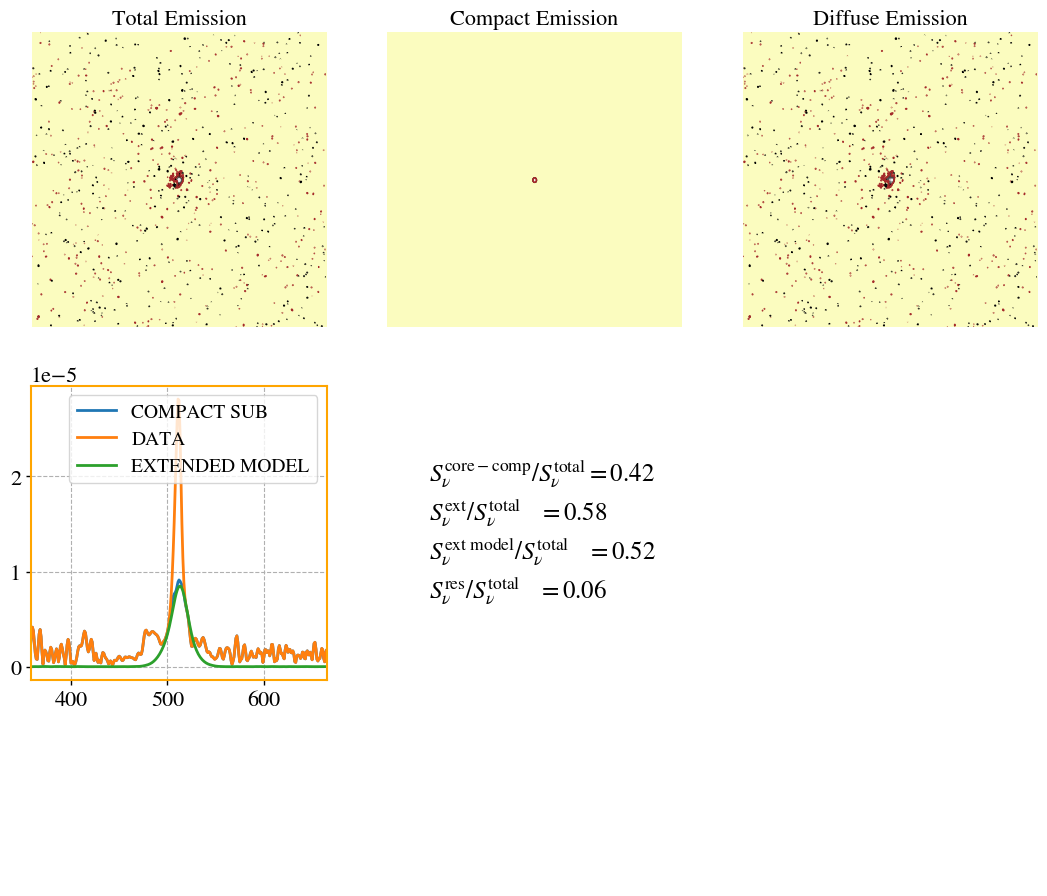

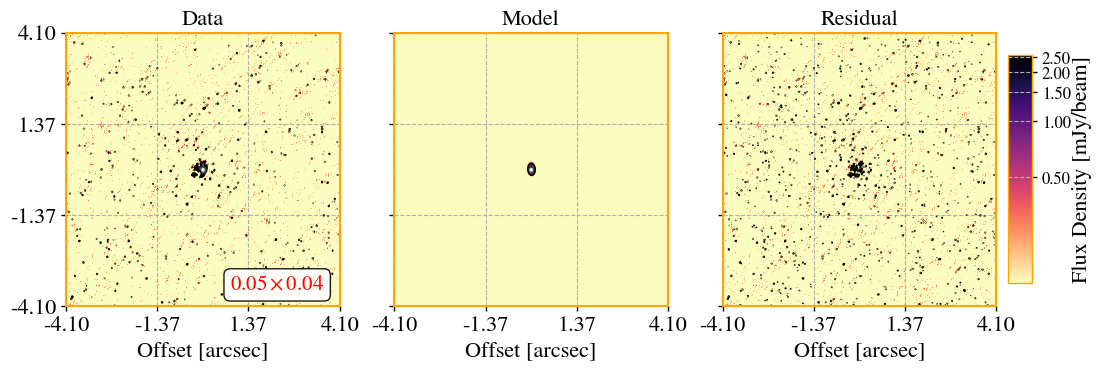

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2009: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


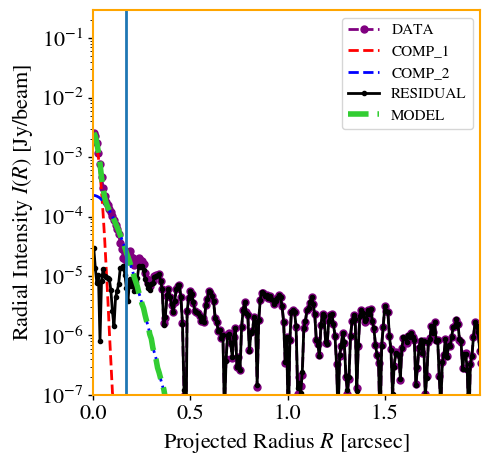

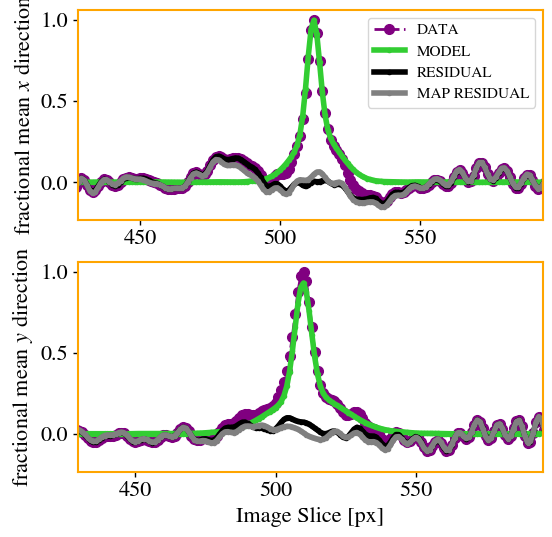

5.184624
Using rms provided...
128 512 384


/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:262: RuntimeWarning: invalid value encountered in divide
  qmedian = np.nanmedian(BB / AA)
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:264: RuntimeWarning: invalid value encountered in divide
  qmi = np.nanmedian((BB / AA)[:rsplit])
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:265: RuntimeWarning: invalid value encountered in divide
  qmo = np.nanmedian((BB / AA)[rsplit:])


1.4927053303604616 2.8209479177387813 4.442433223290478 5.440847306724618
Sum of fluxes =  0.002823838101670488


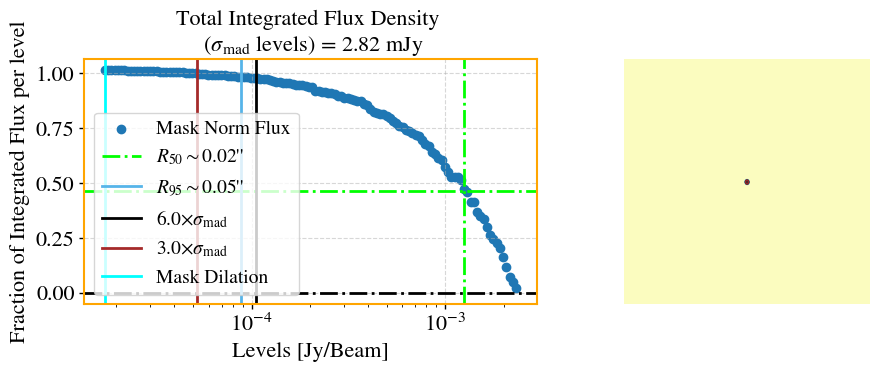

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2009: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


5.184624
Using rms provided...
128 512 384
non real ellipse
non real ellipse
non real ellipse
non real ellipse
non real ellipse
non real ellipse
non real ellipse
non real ellipse


/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:262: RuntimeWarning: invalid value encountered in divide
  qmedian = np.nanmedian(BB / AA)
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:264: RuntimeWarning: invalid value encountered in divide
  qmi = np.nanmedian((BB / AA)[:rsplit])
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:265: RuntimeWarning: invalid value encountered in divide
  qmo = np.nanmedian((BB / AA)[rsplit:])


0.5641895835477563 1.1283791670955126 1.7841241161527712 2.256758334191025
Sum of fluxes =  0.0028346779933125536


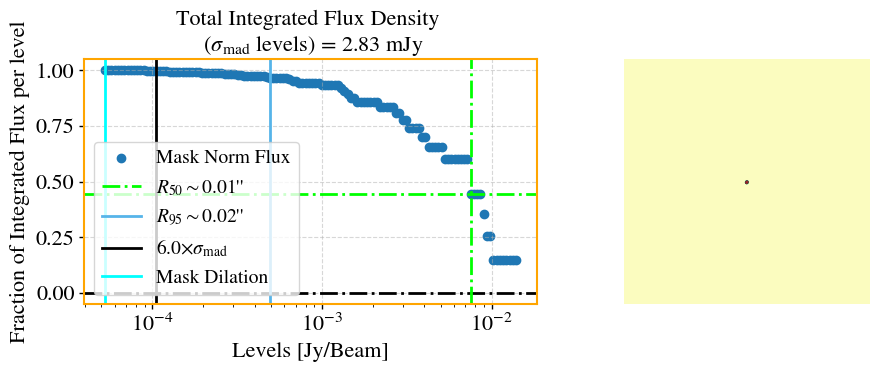

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2009: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


5.184624
Using rms provided...
128 512 384


/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:262: RuntimeWarning: invalid value encountered in divide
  qmedian = np.nanmedian(BB / AA)
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:264: RuntimeWarning: invalid value encountered in divide
  qmi = np.nanmedian((BB / AA)[:rsplit])
/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/fitEllipse2018.py:265: RuntimeWarning: invalid value encountered in divide
  qmo = np.nanmedian((BB / AA)[rsplit:])


5.917270272703197 10.013371767186818 14.306406146065385 16.351767622932517
Sum of fluxes =  0.0035452630204031743


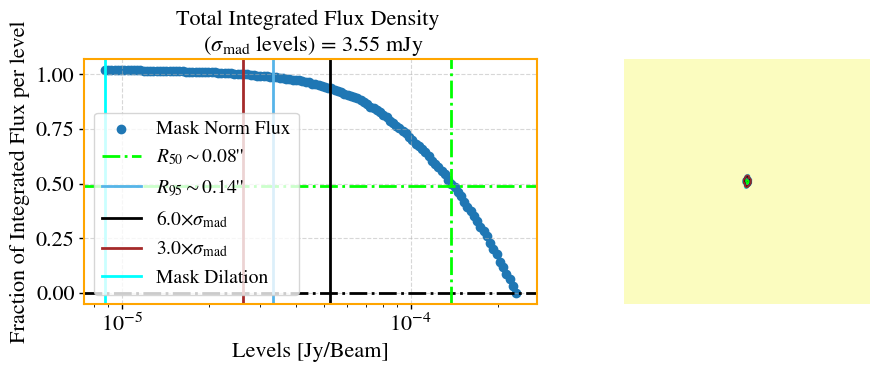

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2009: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


5.184624
Using rms provided...
128 512 384
5.698035485213008 9.869286963719311 14.002817212590296 15.877702285203682
Sum of fluxes =  0.003541957719321633


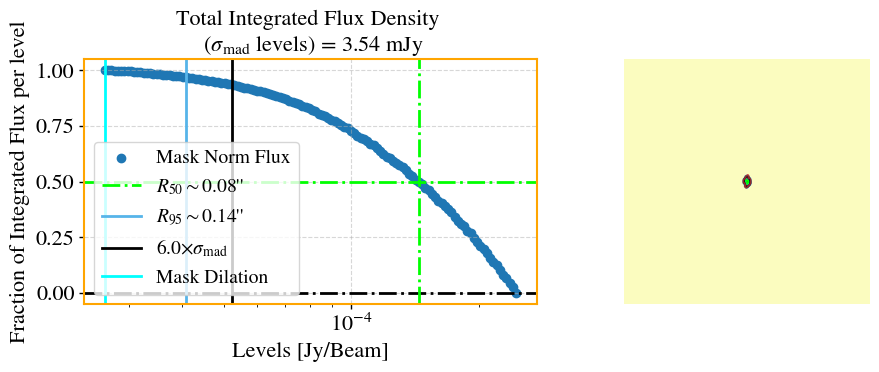

/media/sagauga/xfs_evo/cloud/pcloud-arch/PhD/GitHub/morphen/libs/libs.py:2009: RuntimeWarning: invalid value encountered in divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \
2023-10-05 14:02:04 - INFO - +--------------------------------+
2023-10-05 14:02:04 - INFO - | Core-Compact Component Sizes |
2023-10-05 14:02:04 - INFO - +--------------------------------+
2023-10-05 14:02:04 - INFO -  >=> Beam Size = 5.00 px
2023-10-05 14:02:04 - INFO -  >=> Beam Size = 32.82  pc
2023-10-05 14:02:04 - INFO -  >=> Rn Main Compact = 8.92  pc
2023-10-05 14:02:04 - INFO -  >=> C50 Compact Deconv Radii = 7.41  pc
2023-10-05 14:02:04 - INFO -  >=> C50 Compact Conv Radii = 18.52  pc
2023-10-05 14:02:04 - INFO -  >=> C95 Compact Deconv Radii = 17.37  pc
2023-10-05 14:02:04 - INFO -  >=> C95 Compact Conv Radii = 42.39  pc
2023-10-05 14:02:04 - INFO - +----------------------------+
2023-10-05 14:02:04 - INFO - | Extended Component Sizes |
2023-10-05 14:02:04 - INFO - +--

In [28]:
smfr = mp.sersic_multifit_radio(input_data,
                                SE, #source extraction object, from previous step
                                which_residual = 'shuffled', #natural or shuffled
                                fix_geometry=True,
                                comp_ids=['1'],# which component ID is compact?
                                dr_fix=[5,50,5,100,100,100],#fix (x0,y0) positions
                                fix_value_n=[0.5,0.5,0.5,0.5,0.5,0.5,0.5],
                                fix_n=[True,True,True,True,True,True],
                                aspect=None,#elliptical or circular gaussian for beam convolution? 
                                z = z_d['VV705'])

### Analysing Results


All results are stored in the object `smfr`. 
Model images (convolved and deconvolved) are saved as `.fits` files having a copy of the header 
from the original image file data. Example of these files are: 
 - `*_dec_model.fits` >> Deconvolved total model.
 - `*_model.fits` >> Convolved total model.
 - `*_residual.fits` >> Residual model image. 
 - `*_dec_model_component_i.fits` >> Deconvolved model image for model component `i`. `i` vary from 1 to the total number of model components.
 - `*_model_component_i.fits` >> Convolved model image for model component `i`.
 - `*_compact.fits` >> Convolved image containing all compact structures.
 - `*_extended.fits` >> Convolved image containing the extended structures. This is obtained by `extended = data - compact`.
 - `*_fit.pickle` >> Contains a pickle object with all the `LMFIT` results.
 - `*_fit_modeldict.pickle` >> Contains a pickle object with all model components images (convolved and deconvolved). Note, this is a big file.
 - `*_model_mini_params.csv` >> contain the best-fit minimised parameters and (when possible) standard errors.
 - `*_mini_corr.csv` >> When successful, this contains the correlation matrix for the model parameters. 


First, we can inspect the model images, residual and diffuse emission.

510.59595589863505

  >> Center -->  [512 510   0   0]


Text(0.5, 1.0, 'Data')

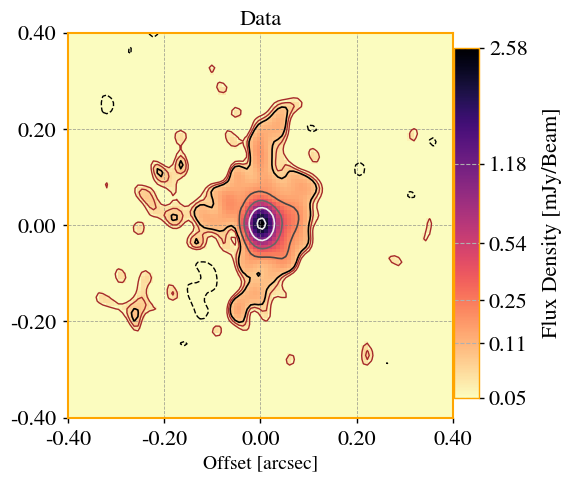

In [45]:
# center = nd.maximum_position(input_data.image_data_2D)
center = (int(smfr.results_fit['f1_x0'][0]),int(smfr.results_fit['f1_y0'][0]))
rms = mad_std(input_data.residual_data_2D)
ax = eimshow(input_data.filename,
             crop=True,box_size=50,vmax_factor=1.0,
             vmax=input_data.image_data_2D.max(),rms=rms)
ax.set_title('Data')

Error loading fits file
Error loading fits file
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


Text(0.5, 1.0, 'Diffuse Emission')

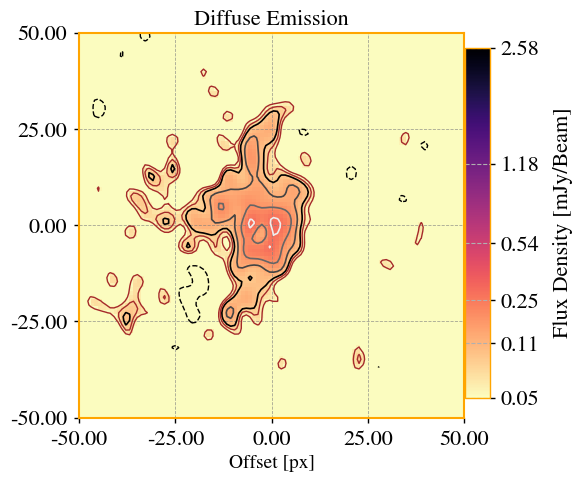

In [38]:
ax = eimshow(input_data.image_data_2D- smfr.models[0]['model_c1_conv'],
        crop=True,box_size=50,vmax_factor=1.0,
        rms=rms,vmax=input_data.image_data_2D.max())
ax.set_title('Diffuse Emission')

Error loading fits file
Error loading fits file
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


Text(0.5, 1.0, 'Compact Deconvolved')

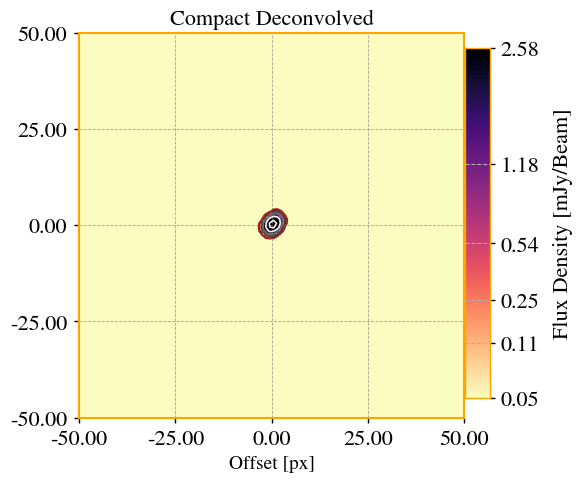

In [39]:
ax=eimshow(smfr.models[0]['model_c1'],
           crop=True,box_size=50,rms=rms,
           vmax=input_data.image_data_2D.max())
ax.set_title('Compact Deconvolved')

Error loading fits file
Error loading fits file
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


Text(0.5, 1.0, 'Compact Convolved')

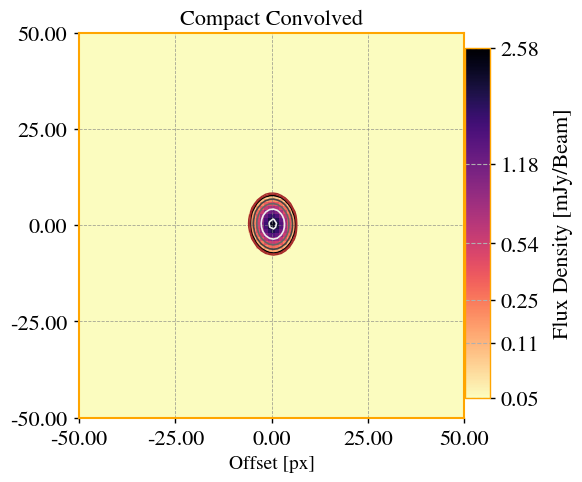

In [40]:
ax=eimshow(smfr.models[0]['model_c1_conv'],
           crop=True,box_size=50,rms=rms,
           vmax=input_data.image_data_2D.max())
ax.set_title('Compact Convolved')

Error loading fits file
Error loading fits file
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


Text(0.5, 1.0, 'Model Deconvolved')

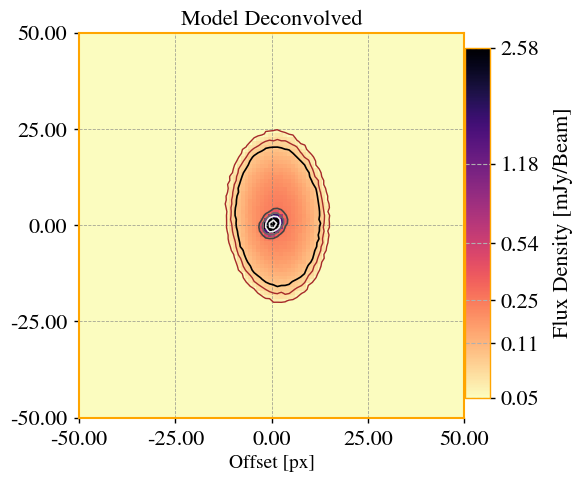

In [41]:
ax=eimshow(smfr.models[0]['model_total'],
           crop=True,box_size=50,rms=rms,
           vmax=input_data.image_data_2D.max())
ax.set_title('Model Deconvolved')

Error loading fits file
Error loading fits file
No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


Text(0.5, 1.0, 'Model Convolved')

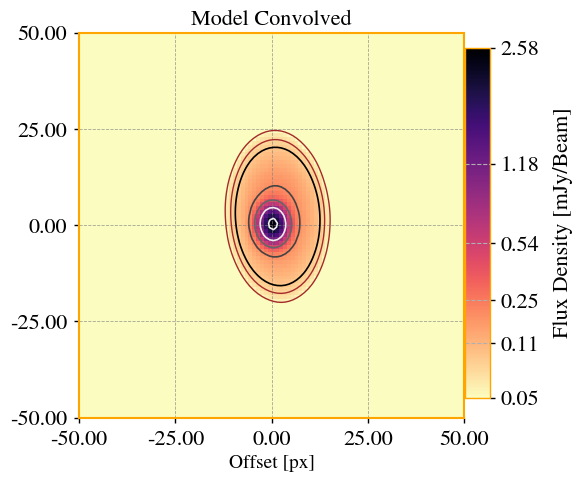

In [42]:
ax=eimshow(smfr.models[0]['model_total_conv'],
           crop=True,box_size=50,rms=rms,
           vmax=input_data.image_data_2D.max())
ax.set_title('Model Convolved')

No cell or pixel size information in the image wcs/header. Setting cell/pixel size = 1.


Text(0.5, 1.0, 'Residual')

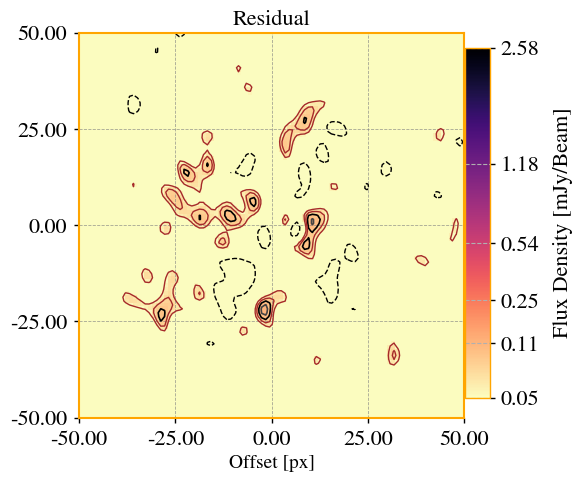

In [46]:
ax = eimshow(input_data.image_data_2D- smfr.models[0]['model_total_conv'],
             center=center,
             crop=True,box_size=50,vmax_factor=1.0,vmin_factor=3,
             rms=rms,
             vmax=input_data.image_data_2D.max()
            )
ax.set_title('Residual')

In [47]:
print(f"Total flux in model = {smfr.results_fit['flux_density_model'][0]:.2f} mJy")
print(f"Total flux in data = {smfr.results_fit['flux_data'][0]:.2f} mJy")
print(f"Total flux in res = {smfr.results_fit['flux_res'][0]:.2f} mJy")


Total flux in model = 6.39 mJy
Total flux in data = 6.84 mJy
Total flux in res = 0.44 mJy


#### Analysing fit statistics (model parameters)

In [116]:
smfr.lmfit_results[0]

Parameters([('f1_x0', <Parameter 'f1_x0', value=506.0865300951392 +/- 0.00178, bounds=[503.63121321936865:513.6312132193686]>), ('f1_y0', <Parameter 'f1_y0', value=509.10609262907826 +/- 0.00142, bounds=[505.3437629946385:515.3437629946385]>), ('f1_PA', <Parameter 'f1_PA', value=17.85046694680816 +/- 0.128, bounds=[-12.373023823731685:167.62697617626833]>), ('f1_ell', <Parameter 'f1_ell', value=0.0958901773828221 +/- 0.00035, bounds=[0.012386710045790306:0.5]>), ('f1_n', <Parameter 'f1_n', value=0.5099935487487645 +/- 0.00738, bounds=[0.49:0.51]>), ('f1_In', <Parameter 'f1_In', value=0.01543820834966389 +/- 0.000163, bounds=[0.00027807669030153196:0.2780766903015319]>), ('f1_Rn', <Parameter 'f1_Rn', value=11.546129369841912 +/- 0.352, bounds=[0.2936107221444289:58.72214442888578]>), ('f1_cg', <Parameter 'f1_cg', value=-0.007865900519489316 +/- 0.0202, bounds=[-0.01:0.01]>), ('f2_x0', <Parameter 'f2_x0', value=552.0730432427409 +/- 0.0444, bounds=[550.4857445865005:560.4857445865005]>), ('f2_y0', <Parameter 'f2_y0', value=356.89741420337 +/- 0.0513, bounds=[346.89741423905974:356.89741423905974]>), ('f2_PA', <Parameter 'f2_PA', value=40.3842108922968 +/- 0.121, bounds=[-54.43470144883913:125.56529855116088]>), ('f2_ell', <Parameter 'f2_ell', value=0.3455212367059418 +/- 0.00112, bounds=[0.05570175925614898:0.5570175925614897]>), ('f2_n', <Parameter 'f2_n', value=0.5099999999 +/- 0.00473, bounds=[0.49:0.51]>), ('f2_In', <Parameter 'f2_In', value=9.415712703494718e-05 +/- 7.5e-07, bounds=[6.294870258050466e-06:0.006294870258050466]>), ('f2_Rn', <Parameter 'f2_Rn', value=53.596575220120606 +/- 1.81, bounds=[0.4084466173294263:81.68932346588525]>), ('f2_cg', <Parameter 'f2_cg', value=-0.009999948599402697 +/- 0.0147, bounds=[-0.01:0.01]>), ('f3_x0', <Parameter 'f3_x0', value=436.83232890677687 +/- 0.0635, bounds=[429.4905551170215:439.4905551170215]>), ('f3_y0', <Parameter 'f3_y0', value=759.188329496716 +/- 0.0718, bounds=[753.3371990475292:763.3371990475292]>), ('f3_PA', <Parameter 'f3_PA', value=37.55890515164755 +/- 1.64, bounds=[-30.141458317992615:149.8585416820074]>), ('f3_ell', <Parameter 'f3_ell', value=0.49956804686703543 +/- 0.0291, bounds=[0.04024200251109673:0.5]>), ('f3_n', <Parameter 'f3_n', value=0.5058858015622661 +/- 0.102, bounds=[0.49:0.51]>), ('f3_In', <Parameter 'f3_In', value=0.00040751101034843624 +/- 2.88e-05, bounds=[8.272985606334474e-06:0.008272985606334474]>), ('f3_Rn', <Parameter 'f3_Rn', value=10.848722046134865 +/- 1.18, bounds=[0.22498499699939992:44.99699939987998]>), ('f3_cg', <Parameter 'f3_cg', value=-0.00848293493562441 +/- 0.0707, bounds=[-0.01:0.01]>), ('f4_x0', <Parameter 'f4_x0', value=524.8559280314458 +/- 0.0317, bounds=[408.63121321936865:608.6312132193686]>), ('f4_y0', <Parameter 'f4_y0', value=505.34813639602703 +/- 0.0168, bounds=[410.3437629946385:610.3437629946385]>), ('f4_PA', <Parameter 'f4_PA', value=158.45144952192527 +/- 0.0487, bounds=[-12.373023823731685:167.62697617626833]>), ('f4_ell', <Parameter 'f4_ell', value=0.2821830256960747 +/- 0.000378, bounds=[0.012386710045790306:0.5]>), ('f4_n', <Parameter 'f4_n', value=0.4900000001 +/- 0.00139, bounds=[0.49:0.51]>), ('f4_In', <Parameter 'f4_In', value=0.0003372511333075971 +/- 8.24e-07, bounds=[2.7807669030153197e-05:0.027807669030153196]>), ('f4_Rn', <Parameter 'f4_Rn', value=56.48094056764418 +/- 0.504, bounds=[0.8808321664332867:176.16643328665734]>), ('f4_cg', <Parameter 'f4_cg', value=-0.0099999999 +/- 0.00384, bounds=[-0.01:0.01]>), ('f5_x0', <Parameter 'f5_x0', value=450.9665697671425 +/- 0.128, bounds=[408.63121321936865:608.6312132193686]>), ('f5_y0', <Parameter 'f5_y0', value=578.6423227013839 +/- 0.235, bounds=[410.3437629946385:610.3437629946385]>), ('f5_PA', <Parameter 'f5_PA', value=105.86831799265094 +/- 0.0472, bounds=[-12.373023823731685:167.62697617626833]>), ('f5_ell', <Parameter 'f5_ell', value=0.4999999999 +/- 0.000565, bounds=[0.012386710045790306:0.5]>), ('f5_n', <Parameter 'f5_n', value=0.5099999998876801

### Check decomposition results: Compact vs Extended
Now, we can investigate the integrated fluxes between core-compact structures in relation to diffuse ones. 

Note that we consider that the diffuse flux density is the sum between the flux density from the extended model component and the flux density of the residual map.

In [117]:
print(f"Total flux in compact = {smfr.results_fit['flux_density_compact'][0]:.2f} mJy")
print(f"Total flux in extended = {smfr.results_fit['flux_density_extended_model'][0] + smfr.results_fit['flux_res'][0]:.2f} mJy")

# The total flux density in the diffuse regions are saved in:
print(f"Total flux in extended = {smfr.results_fit['flux_density_ext2'][0]:.2f} mJy")


Total flux in compact = 6.76 mJy
Total flux in extended = 5.76 mJy
Total flux in extended = 5.75 mJy


### Physical Sizes of the components
For completeness, we calculate convolved and deconvolved physical properties. 
The properties of the deconvolved model images, referent to compact structures, are stored inside `smfr.results_compact_deconv_morpho`, while properties of convolved model images for compact structures in `smfr.results_compact_conv_morpho`. 

Similarly, we have for the extended structures: `smfr.results_ext_deconv_morpho` and `smfr.results_ext_conv_morpho`. 

Each one of these measurements stores the same quantities that were calculated with `radio_image_analysis` previously, for the full radio emission, but now for individual model components. 

In [118]:
# list(smfr.results_compact_conv_morpho.keys())

In [119]:
# Lets calculate the pixel size in physical units (pc).
print(f"Redshift of VV705 = {z_d['VV705']}")
pix_to_pc = pixsize_to_pc(z=z_d['VV705'],
                          cell_size=get_cell_size(input_data.filename))
print(f"1 px = {pix_to_pc:.2f} pc")

Redshift of VV705 = 0.04019
1 px = 6.56 pc


#### Compact Components
First, let's analyse the results for our compact model(s)/structure(s).

In [120]:
# The effective radius in terms of the Sersic Rn parameter.
# This is a deconvolved quantity.
print(f"Rn ={smfr.results_fit['f1_Rn'][0] * pix_to_pc : .0f} pc")

Rn = 76 pc


In [121]:
# The deconvolved effective radius measured in the deconvolved model image. 
print(f"Deconv R50 ={smfr.results_compact_deconv_morpho['C50radii'][0] * pix_to_pc : .0f} pc")

Deconv R50 = 73 pc


In [122]:
# The convolved effective radius measured in the convolved model image. 
print(f"Conv R50 ={smfr.results_compact_conv_morpho['C50radii'][0] * pix_to_pc : .0f} pc")

Conv R50 = 175 pc


##### Total sizes

In [123]:
# The deconvolved effective radius measured in the deconvolved model image. 
print(f"Deconv R95 ={smfr.results_compact_deconv_morpho['C95radii'][0] * pix_to_pc : .0f} pc")

Deconv R95 = 180 pc


In [124]:
# The convolved effective radius measured in the convolved model image. 
print(f"Conv R95 ={smfr.results_compact_conv_morpho['C95radii'][0] * pix_to_pc : .0f} pc")

Conv R95 = 421 pc


#### Extended Components
Now, we move to our diffuse model(s)/structure(s).

In [125]:
print(f"Rn ={smfr.results_fit['f5_Rn'][0] * pix_to_pc : .0f} pc")

Rn = 1341 pc


In [126]:
print(f"Deconv R50 ={smfr.results_ext_deconv_morpho['C50radii'][0] * pix_to_pc : .0f} pc")

Deconv R50 = 559 pc


In [127]:
print(f"Conv R50 ={smfr.results_ext_conv_morpho['C50radii'][0] * pix_to_pc : .0f} pc")

Conv R50 = 616 pc


#### Total Sizes

In [128]:
print(f"Deconv R95 ={smfr.results_ext_deconv_morpho['C95radii'][0] * pix_to_pc : .0f} pc")

Deconv R95 = 1601 pc


In [129]:
print(f"Conv R95 ={smfr.results_ext_conv_morpho['C95radii'][0] * pix_to_pc : .0f} pc")

Conv R95 = 1631 pc


### Compute SFR Estimates for Diffuse Structures and the Brightness Temperature
For star formation rates, some assumptions are made, as discussed in the paper. 

Here, we take just an approximation, since we are using only one frequency. 
But we are interested in the amount of energy that is coming from diffuse structures, and try to translate that to SFR.

We use the fitting results to compute the SFR. Within `smfr`, information is stored regarding the total flux density in the extended structures (`'flux_density_ext2'`) and the sizes.

The class `radio_star_formation` from `morphen` deals with the calculations, provided the object `smfr`. Note also that you need to provide the redshift of the galaxy. 

In [130]:
SFR = mp.radio_star_formation(input_data,smfr,z=z_d['VV705'])

2023-10-05 12:10:32 - INFO - Using frequency of 6.00 GHz for star formation estimate.
2023-10-05 12:10:32 - INFO - +-----------------+
2023-10-05 12:10:32 - INFO - | SFR Estimates |
2023-10-05 12:10:32 - INFO - +-----------------+
2023-10-05 12:10:32 - INFO -  ==> SFR =44.64 +/- 0.25 Mo/yr
2023-10-05 12:10:32 - INFO - +------------------+
2023-10-05 12:10:32 - INFO - | sSFR Estimates |
2023-10-05 12:10:32 - INFO - +------------------+
2023-10-05 12:10:32 - INFO -  >=> Deconvolved A50 sSFR = 45.39 Mo/(yr kpc^2)
2023-10-05 12:10:32 - INFO -  >=> Convolved A50 sSFR = 37.43 Mo/(yr kpc^2)
2023-10-05 12:10:32 - INFO -  >=> Deconvolved A95 sSFR = 5.54 Mo/(yr kpc^2)
2023-10-05 12:10:32 - INFO -  >=> Convolved A95 sSFR = 5.34 Mo/(yr kpc^2)
2023-10-05 12:10:32 - INFO - +--------------------------+
2023-10-05 12:10:32 - INFO - | Brightness Temperature |
2023-10-05 12:10:32 - INFO - +--------------------------+
2023-10-05 12:10:32 - INFO -  ==> TB Rn Fit = 0.11 e5 K
2023-10-05 12:10:32 - INFO -  =

In [100]:
mp.radio_star_formation??

Init signature:
mp.radio_star_formation(
    input_data,
    SMFR,
    decompose=True,
    z=0.01,
    calibration_kind='Murphy12',
    alpha=-0.85,
    alpha_NT=-0.85,
    frequency=None,
)
Source:        
class radio_star_formation():
    """
    Compute star-formation estimates from radio emission, given the converstion
    law.
    """

    def __init__(self, input_data, SMFR,decompose = True,z=0.01,
                 calibration_kind='Murphy12',
                 alpha = -0.85, alpha_NT = -0.85, frequency = None):
        self.input_data = input_data
        self.SMFR = SMFR
        self.decompose = decompose
        self.z = z
        self.frequency = frequency #in GHz
        self.alpha = alpha
        self.alpha_NT = alpha_NT
        self.return_with_error = True
        self.cell_size = mlibs.get_cell_size(self.input_data.filename)
        self.pix_to_pc = mlibs.pixsize_to_pc(z=self.z,
                                  cell_size=self.cell_size)


        if frequency is None:
  

In [101]:
SFR = mp.radio_star_formation(input_data,smfr,z=z_d['VV705'],calibration_kind='Murphy12',frequency=6)

2023-10-05 02:37:56 - INFO - +-----------------+
2023-10-05 02:37:56 - INFO - | SFR Estimates |
2023-10-05 02:37:56 - INFO - +-----------------+
2023-10-05 02:37:56 - INFO -  ==> SFR =38.25 +/- 0.65 Mo/yr
2023-10-05 02:37:56 - INFO - +------------------+
2023-10-05 02:37:56 - INFO - | sSFR Estimates |
2023-10-05 02:37:56 - INFO - +------------------+
2023-10-05 02:37:56 - INFO -  >=> Deconvolved A50 sSFR = 28.18 Mo/(yr kpc^2)
2023-10-05 02:37:56 - INFO -  >=> Convolved A50 sSFR = 25.63 Mo/(yr kpc^2)
2023-10-05 02:37:56 - INFO -  >=> Deconvolved A95 sSFR = 4.45 Mo/(yr kpc^2)
2023-10-05 02:37:56 - INFO -  >=> Convolved A95 sSFR = 4.38 Mo/(yr kpc^2)
2023-10-05 02:37:56 - INFO - +--------------------------+
2023-10-05 02:37:56 - INFO - | Brightness Temperature |
2023-10-05 02:37:56 - INFO - +--------------------------+
2023-10-05 02:37:56 - INFO -  ==> TB Rn Fit = 0.10 e5 K
2023-10-05 02:37:56 - INFO -  ==> TB R50 Fit = 1.31 e5 K
